In [1]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os  # Used to create folders
from shutil import copyfile  # Used to copy parameters file to directory
from sklearn.metrics import mean_squared_error
import math
%matplotlib inline
import multi_plot

In [34]:
parameters = "../../../Data/parameters.txt"  # Parameters file
sample_parameters = "../Sample Parameter File/parameters.txt"

d = multi_plot.get_parameters(parameters)

if d["resample"] == "y":# if resample is selected then all results are put in a resample folder
    newpath = r"../0. Results/" + d["user"] + "/Evaluation/multi_plot/" + "/resample/"
elif d["specify_subfolder"] == "n":
    print("please specify a subfolder inside multiplot")
    print("..exiting")
    exit()
else:
    newpath = r"../0. Results/" + d["user"] + "/Evaluation/multi_plot/" +  d["specify_subfolder"] +"/"
if not os.path.exists(newpath):
    os.makedirs(newpath)  # Make folder for storing results if it does not exist

copyfile(parameters, newpath + "parameters.txt")  # Save parameters
np.random.seed(int(d["seed"]))  # Set seed

# Plotting for Main, Man, Min

In [3]:
d["input_files"] = ["B4_predictions", "B4_man_b4keepers_predictions", "minB4_b4keepers_predictions"]
d["input_file_names"] = ["Main", "Man", "Min"]

In [4]:
dfs = []
if type(d["input_files"]) == str:
    dfs.append(multi_plot.get_dfs(d, None))
    print("df shape : " , dfs[0].shape)
    input_file_names = [d["input_file_names"]]
else:
    for i in range(len(d["input_files"])):
        dfs.append(multi_plot.get_dfs(d, i))
        print("dfs[%s] shape : " % i, dfs[i].shape)
    input_file_names = d["input_file_names"]

dfs[0] shape :  (28203, 120)
dfs[1] shape :  (28203, 53)
dfs[2] shape :  (28203, 15)


In [ ]:
if d["resample"] == "y":
    from sklearn.utils import resample
    print("\n..resampling\n")
    for i in range(len(dfs)):
        dfs[i] = resample(dfs[i], n_samples=int(d["n_samples"]), random_state=int(d["seed"]))
        dfs[i] = dfs[i].reset_index(drop=True)
        print("DF Shape:", dfs[i].shape)

In [5]:
dfs_pct_close96 = []
df_pct_closes = []
dfs_RMSEs = []

for i, df in enumerate(dfs):
    percent_close, number_close96, RMSEs = multi_plot.get_stats(df)
    dfs_pct_close96.append(number_close96)
    dfs_RMSEs.append(RMSEs)
    df_pct_closes.append(percent_close) # for 1 df

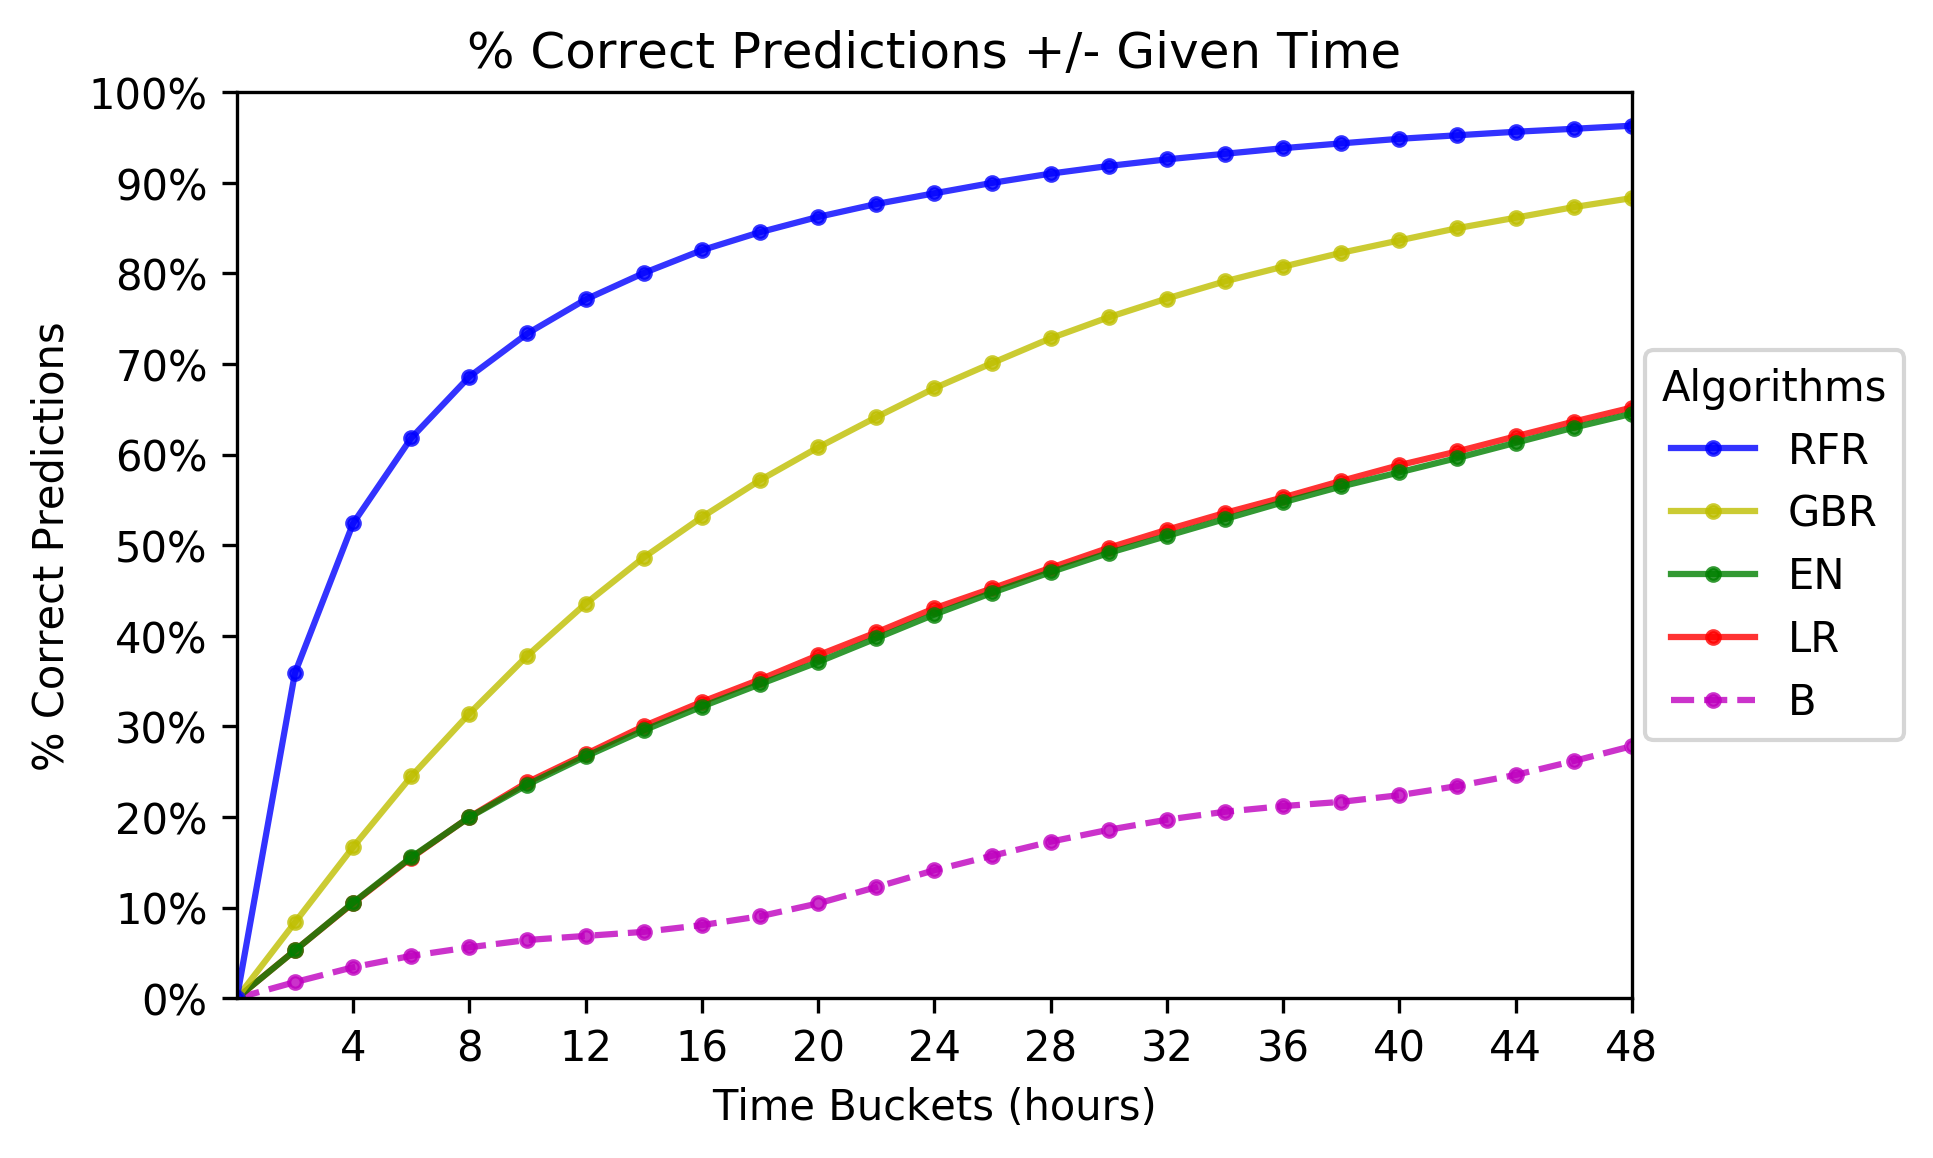

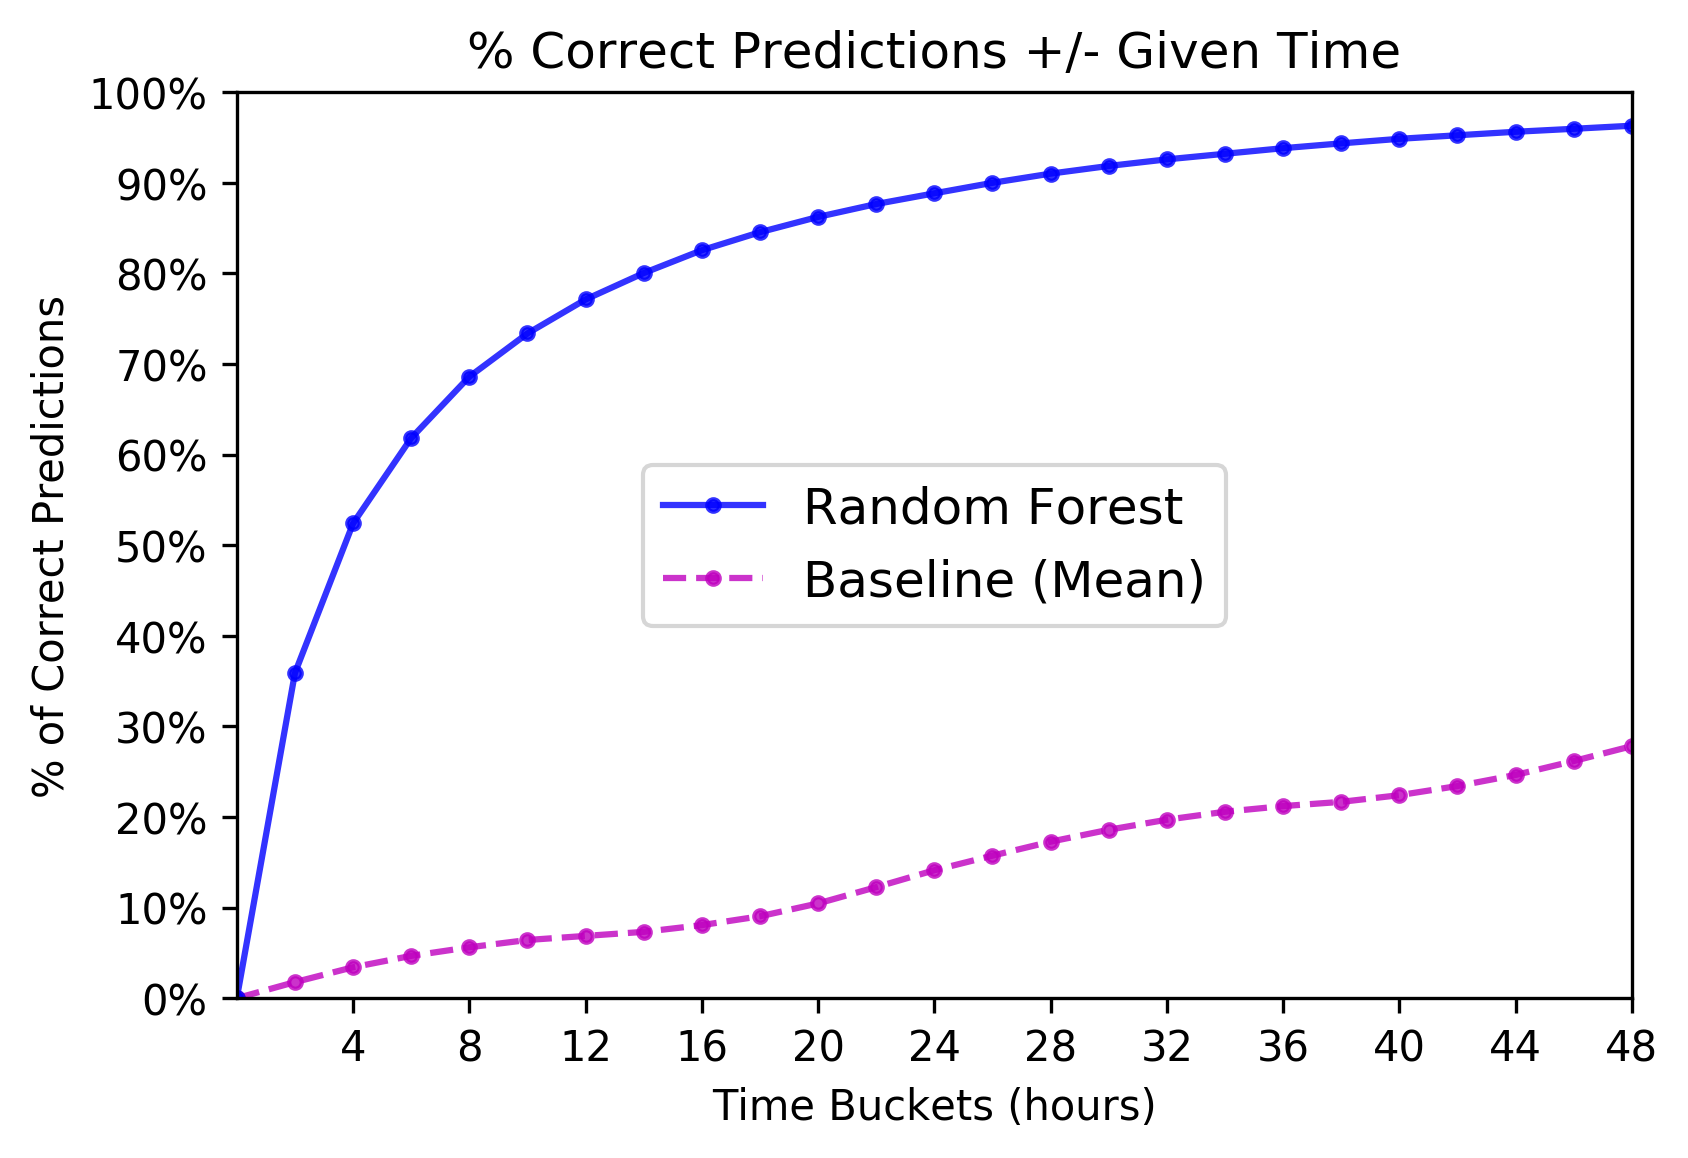

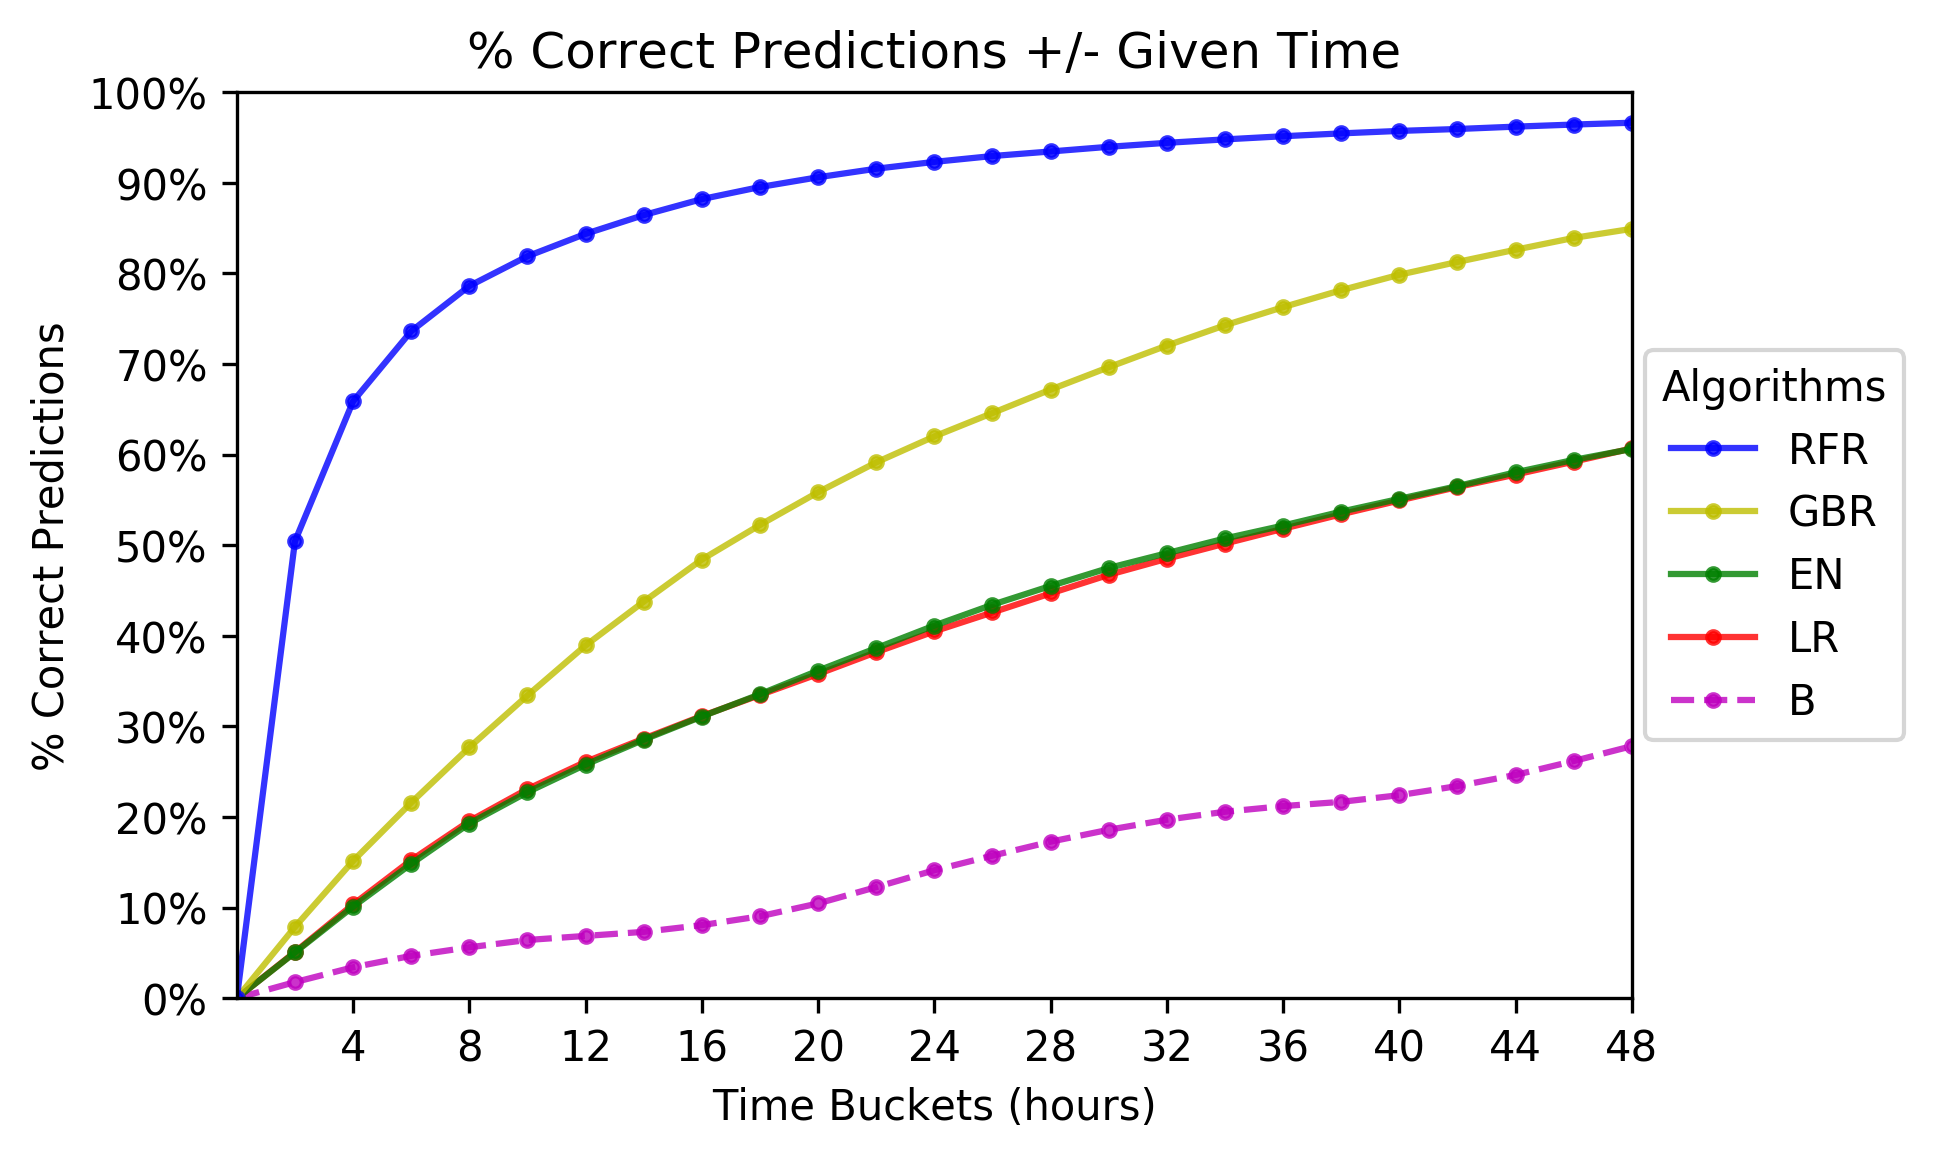

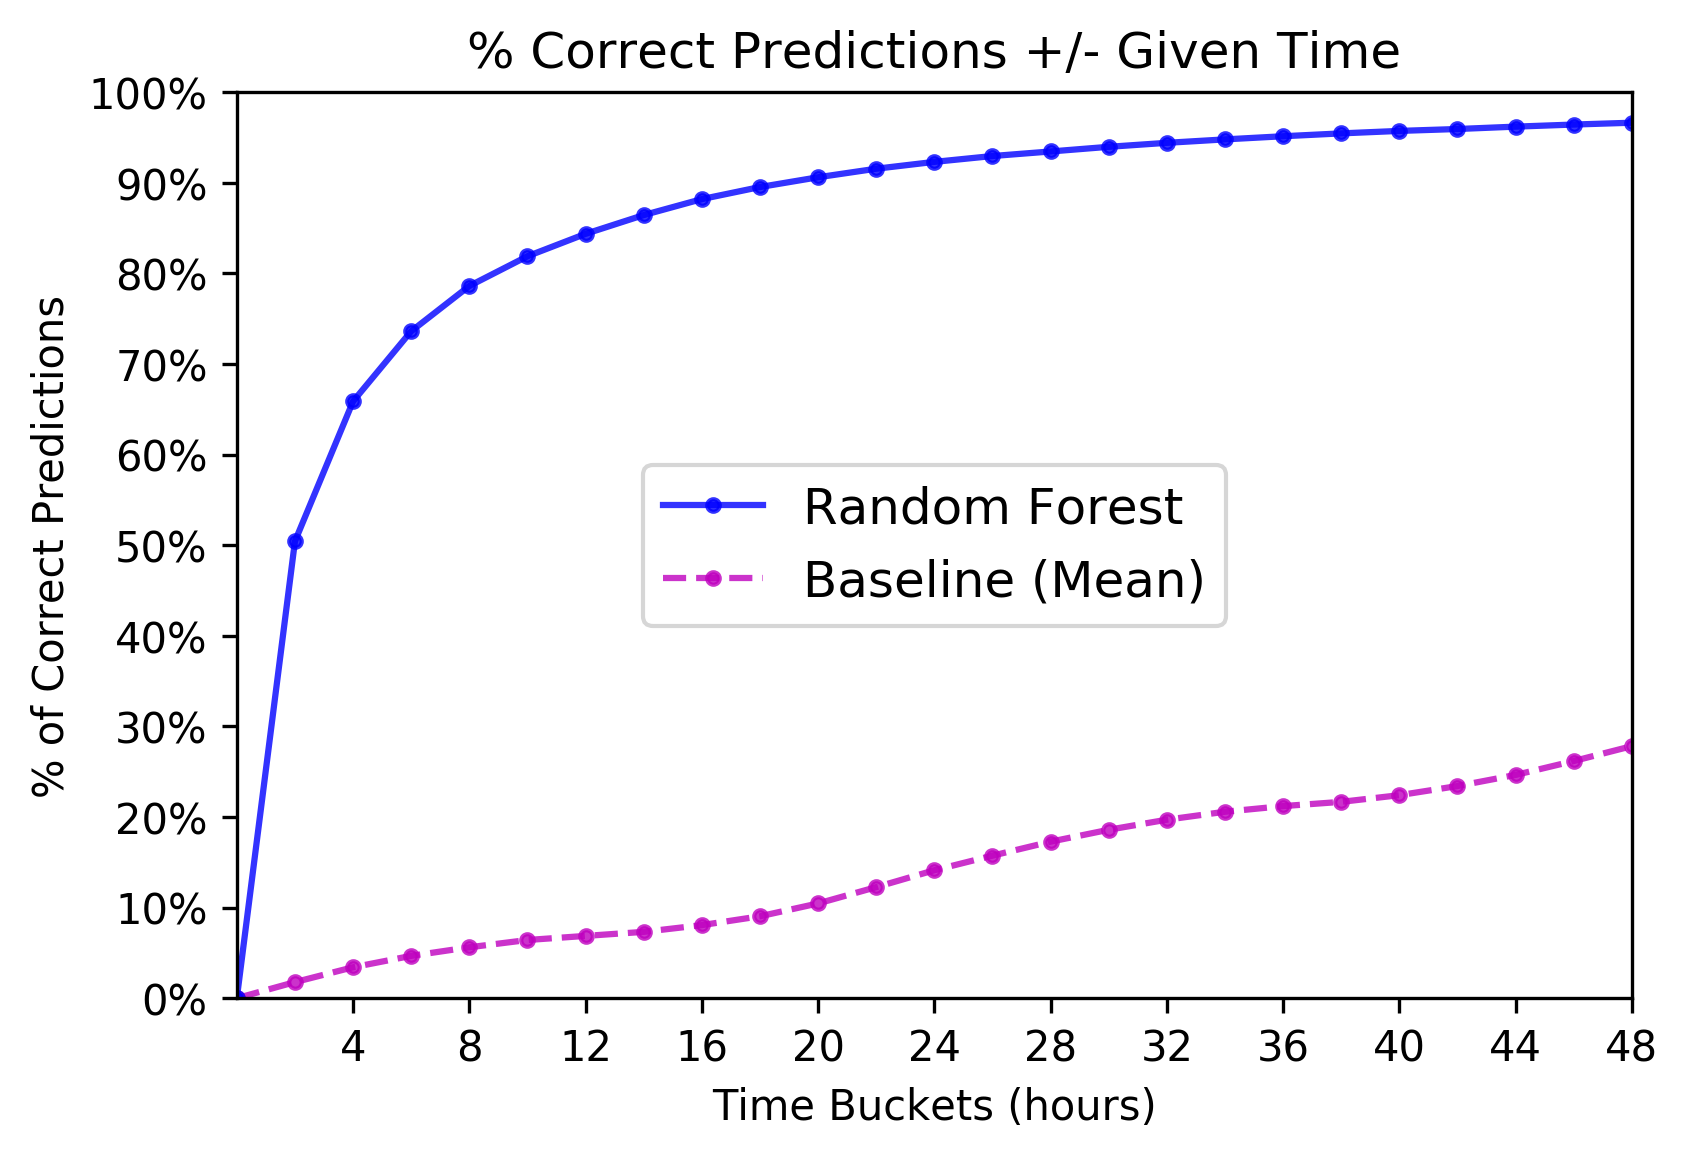

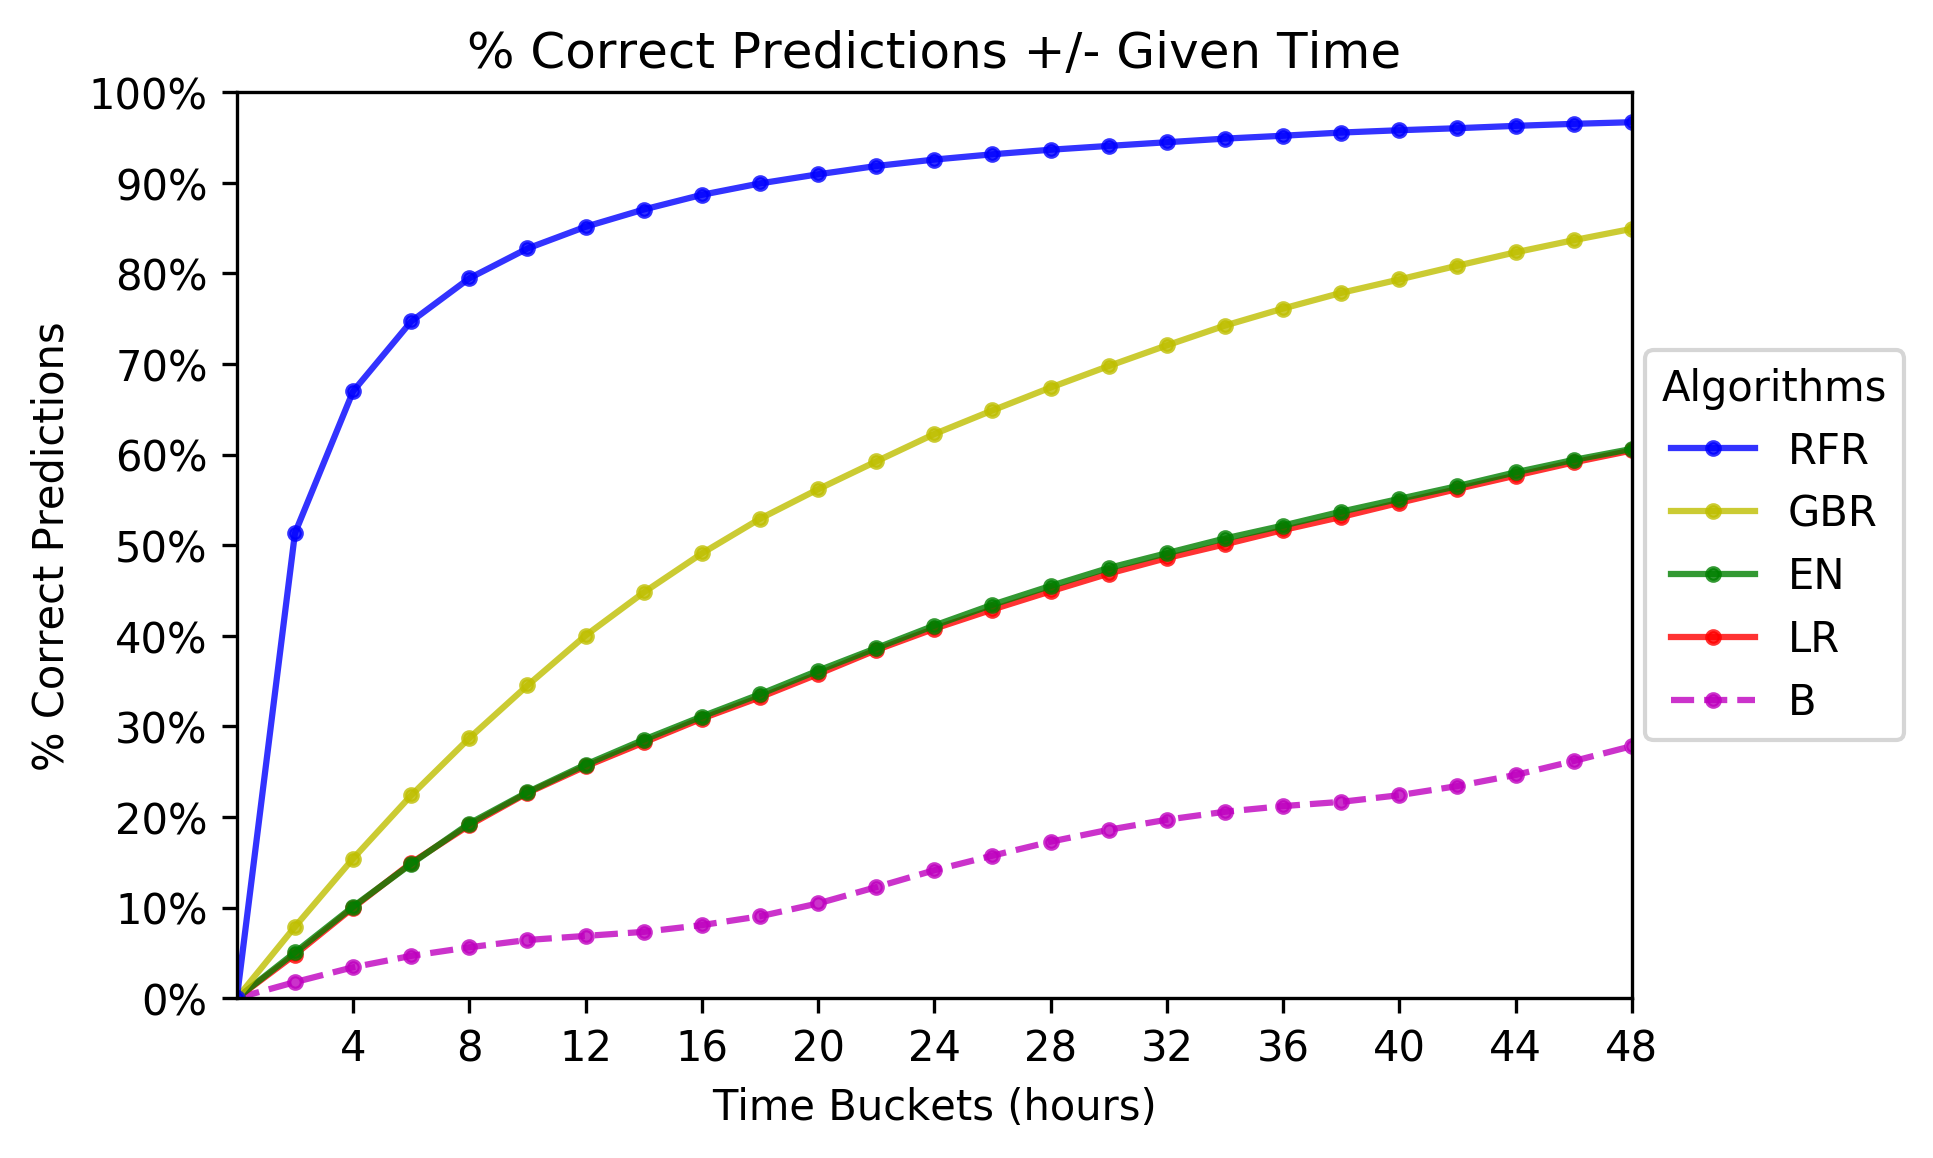

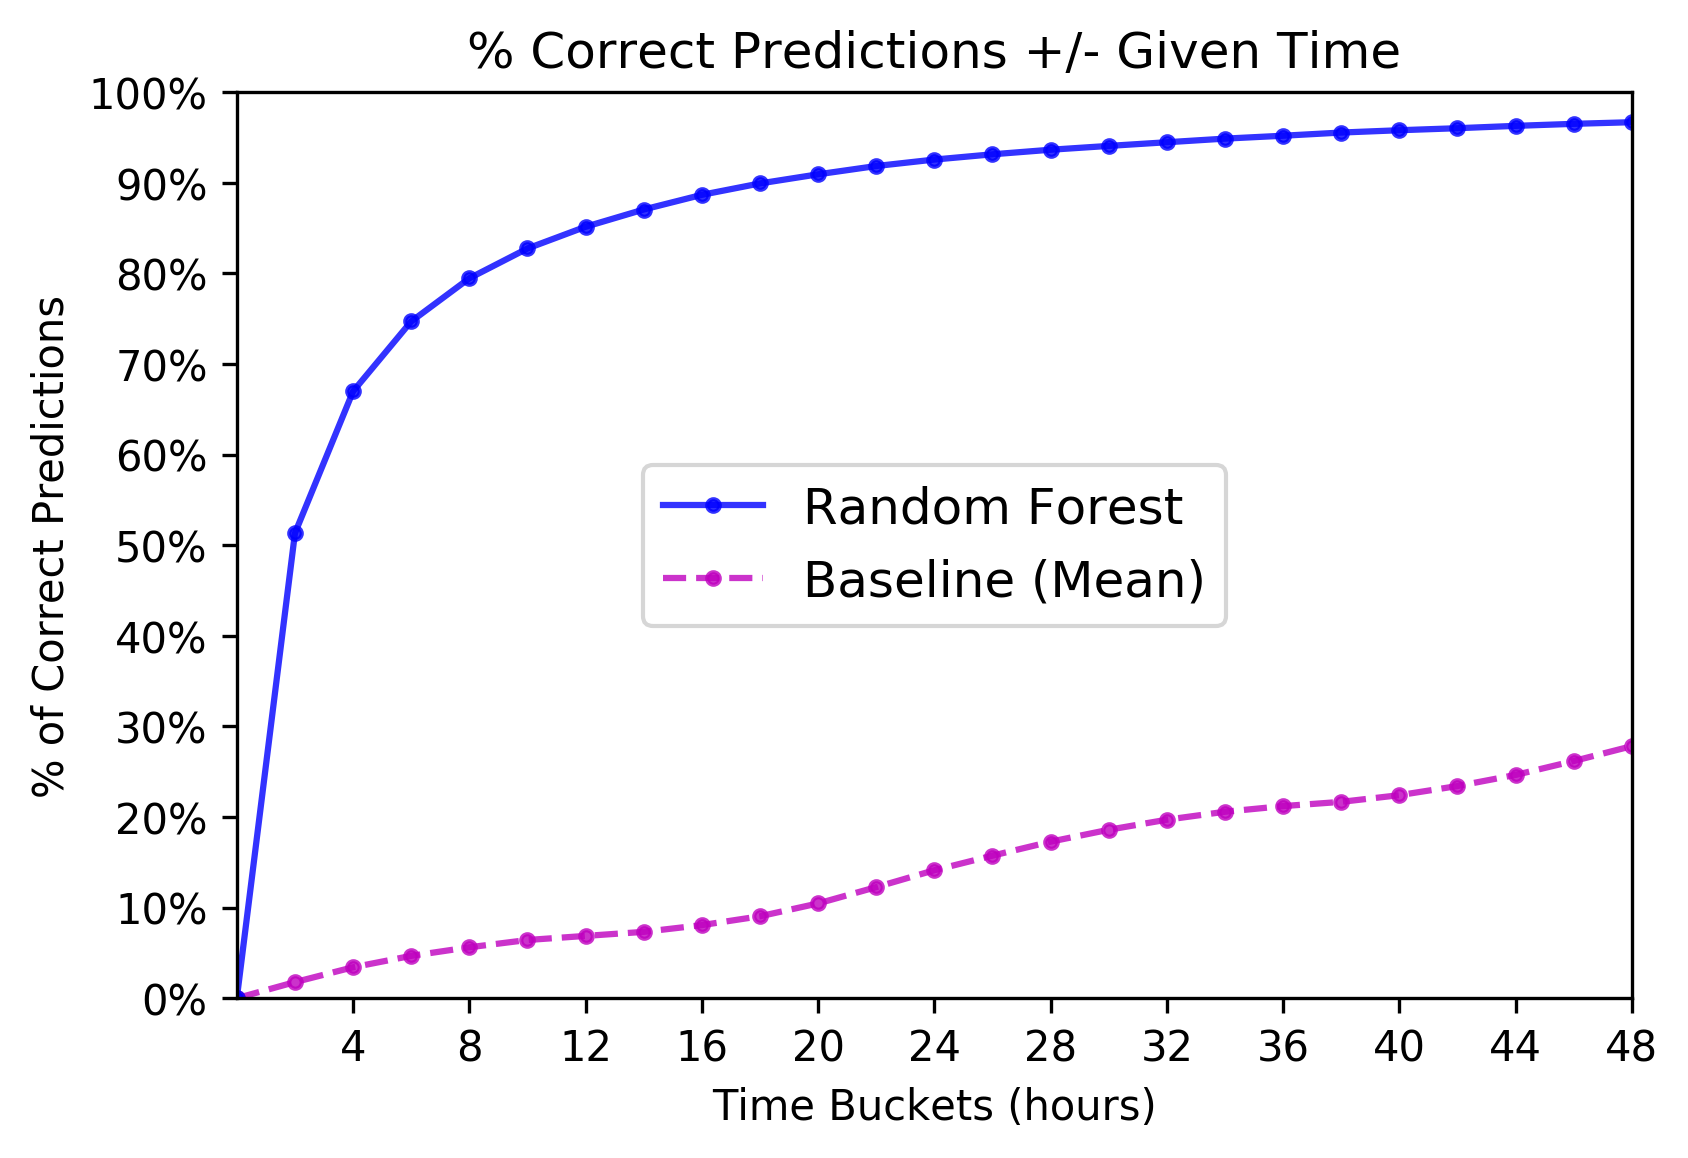

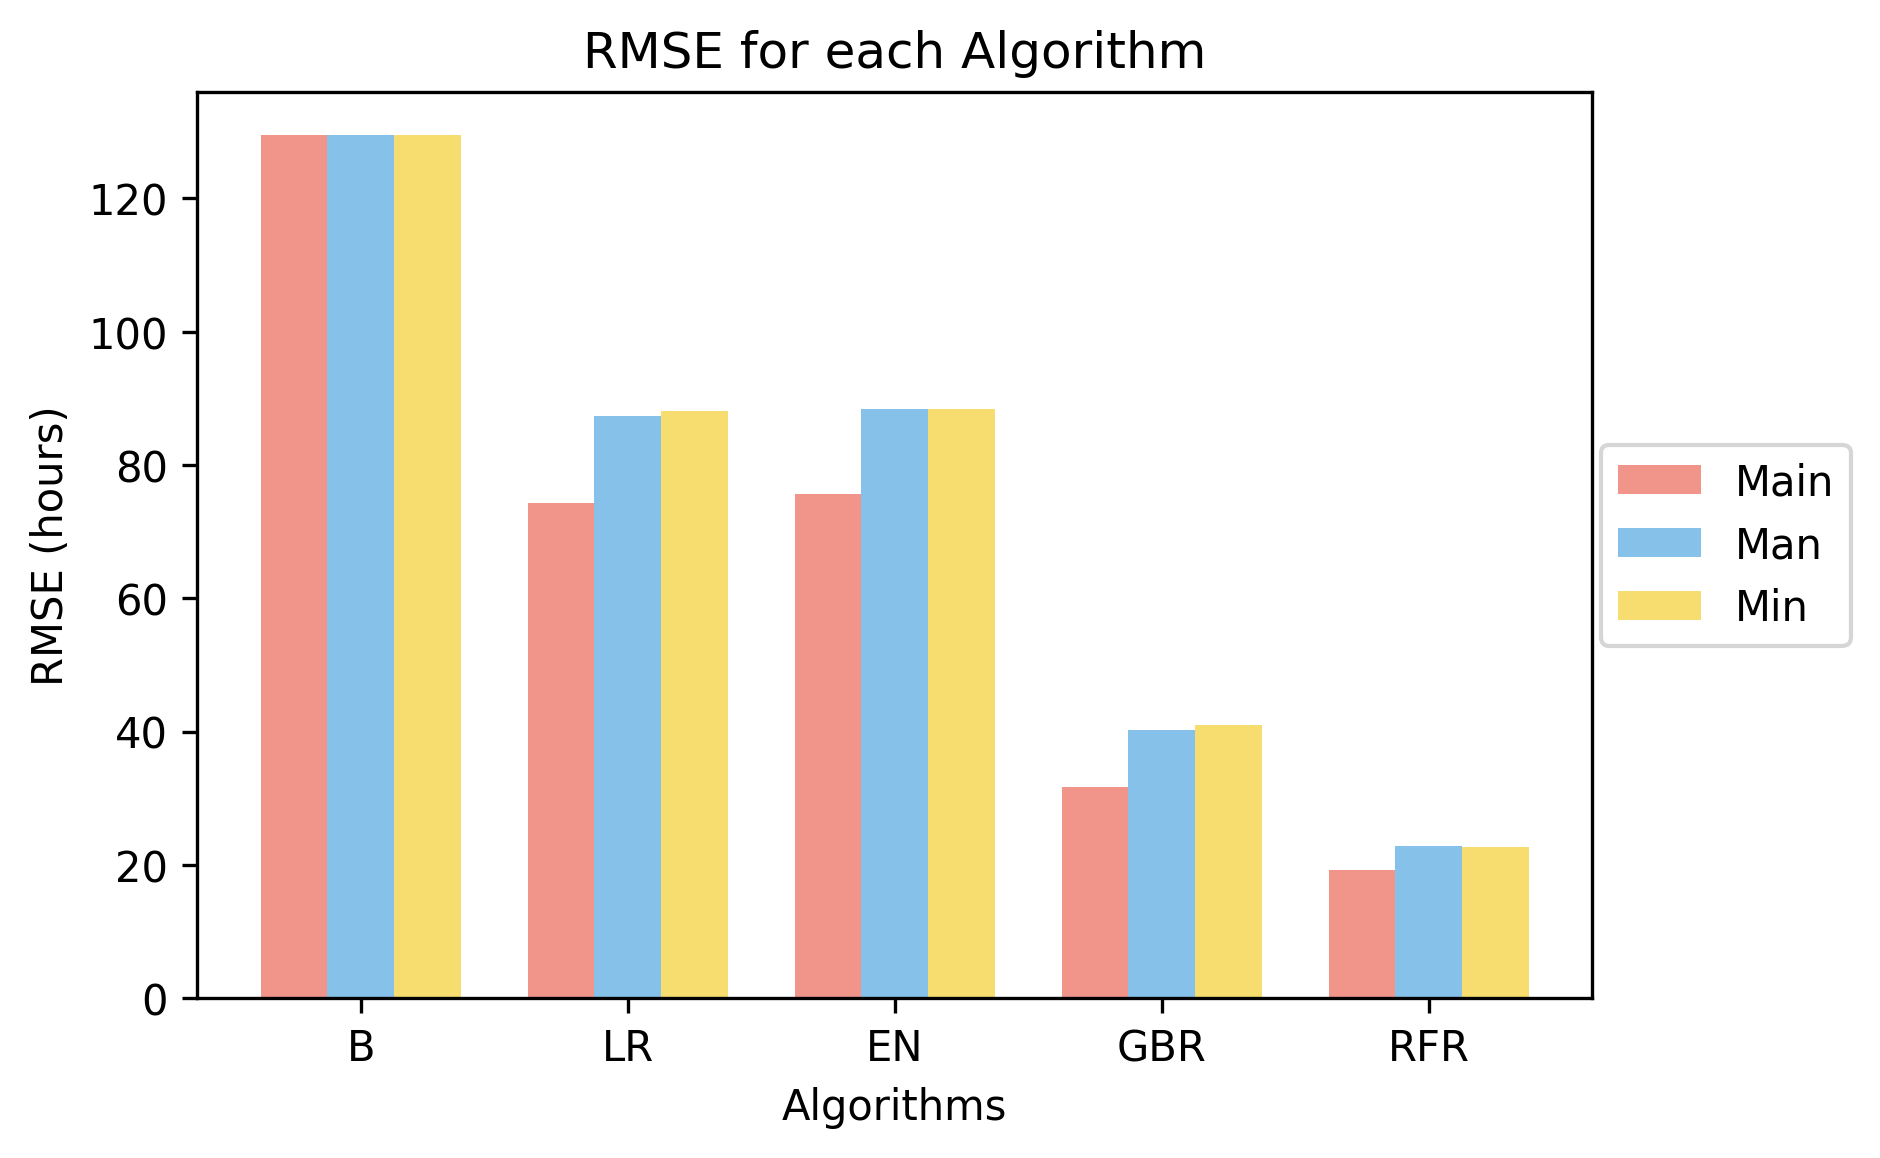

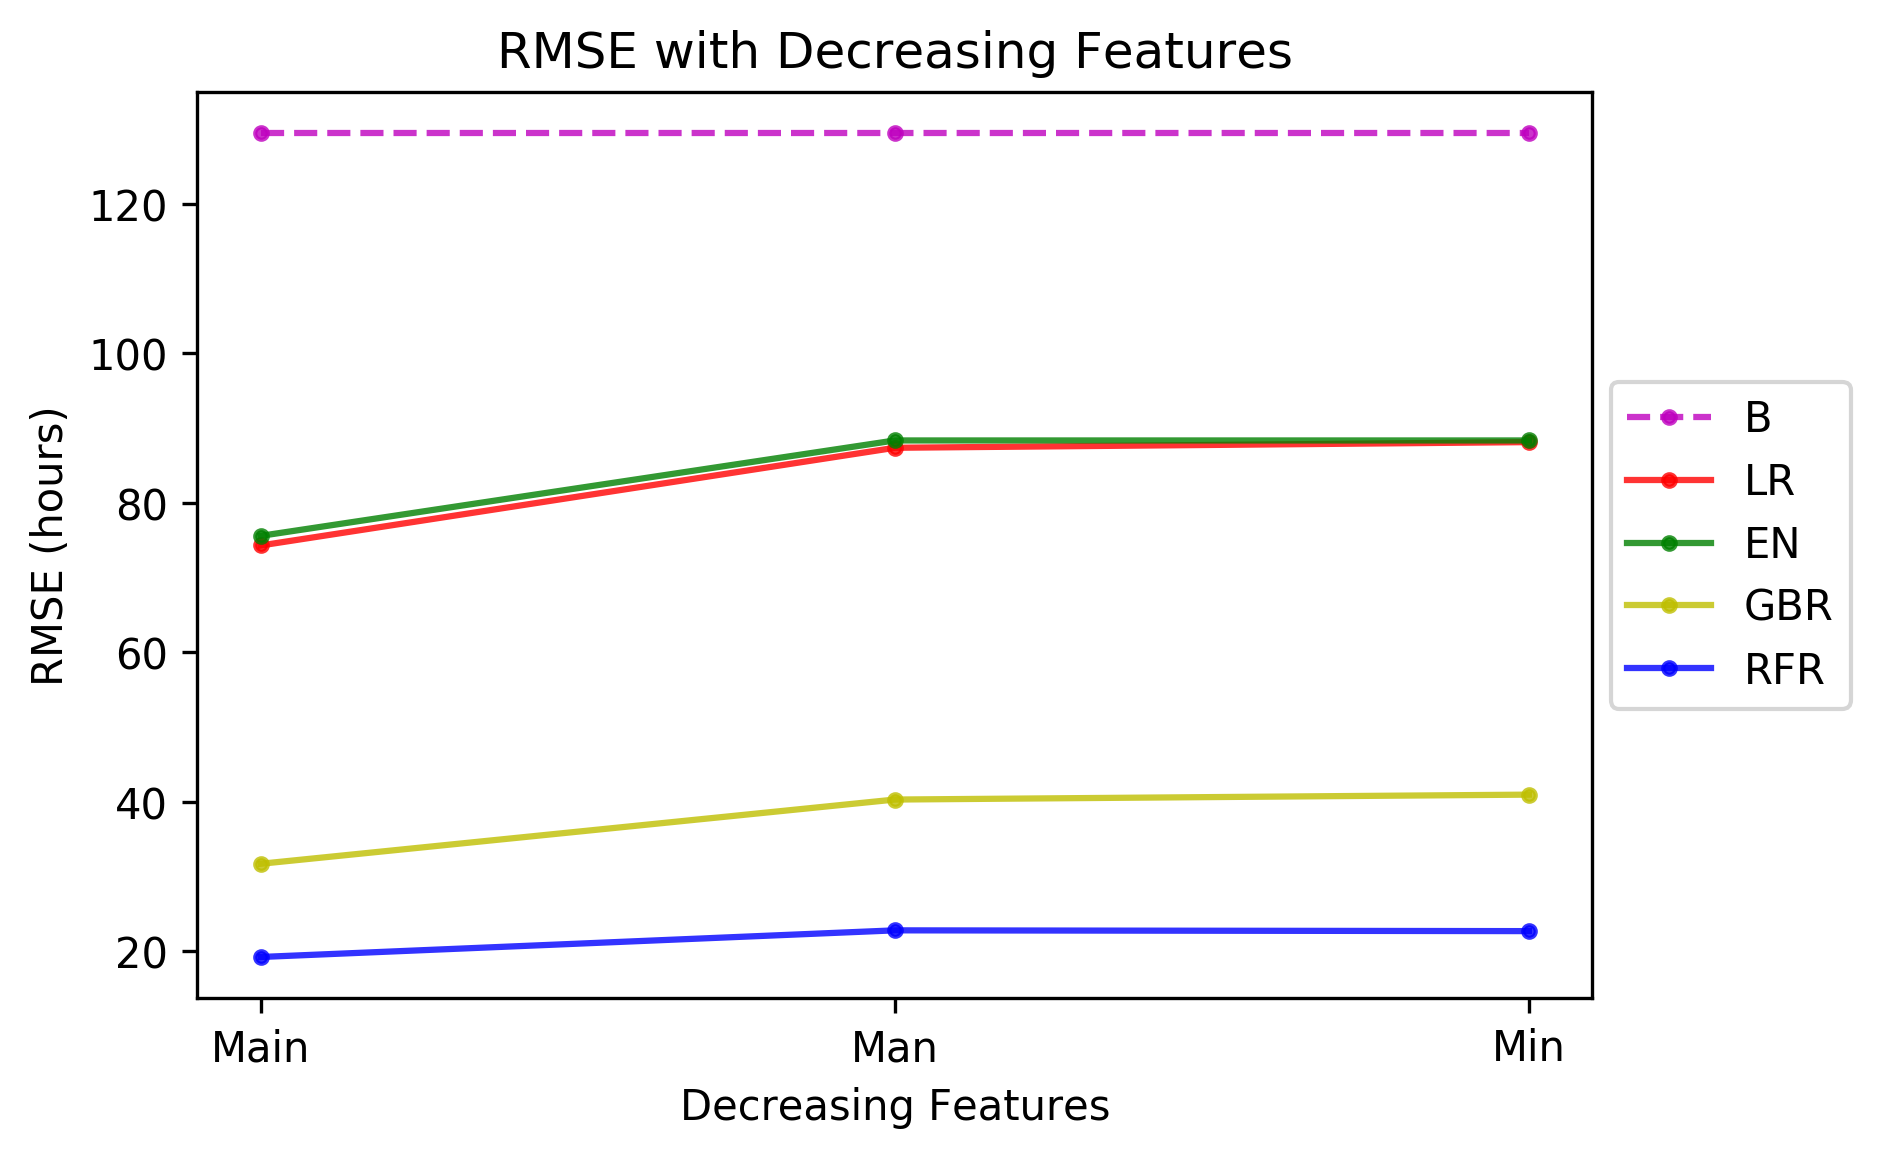

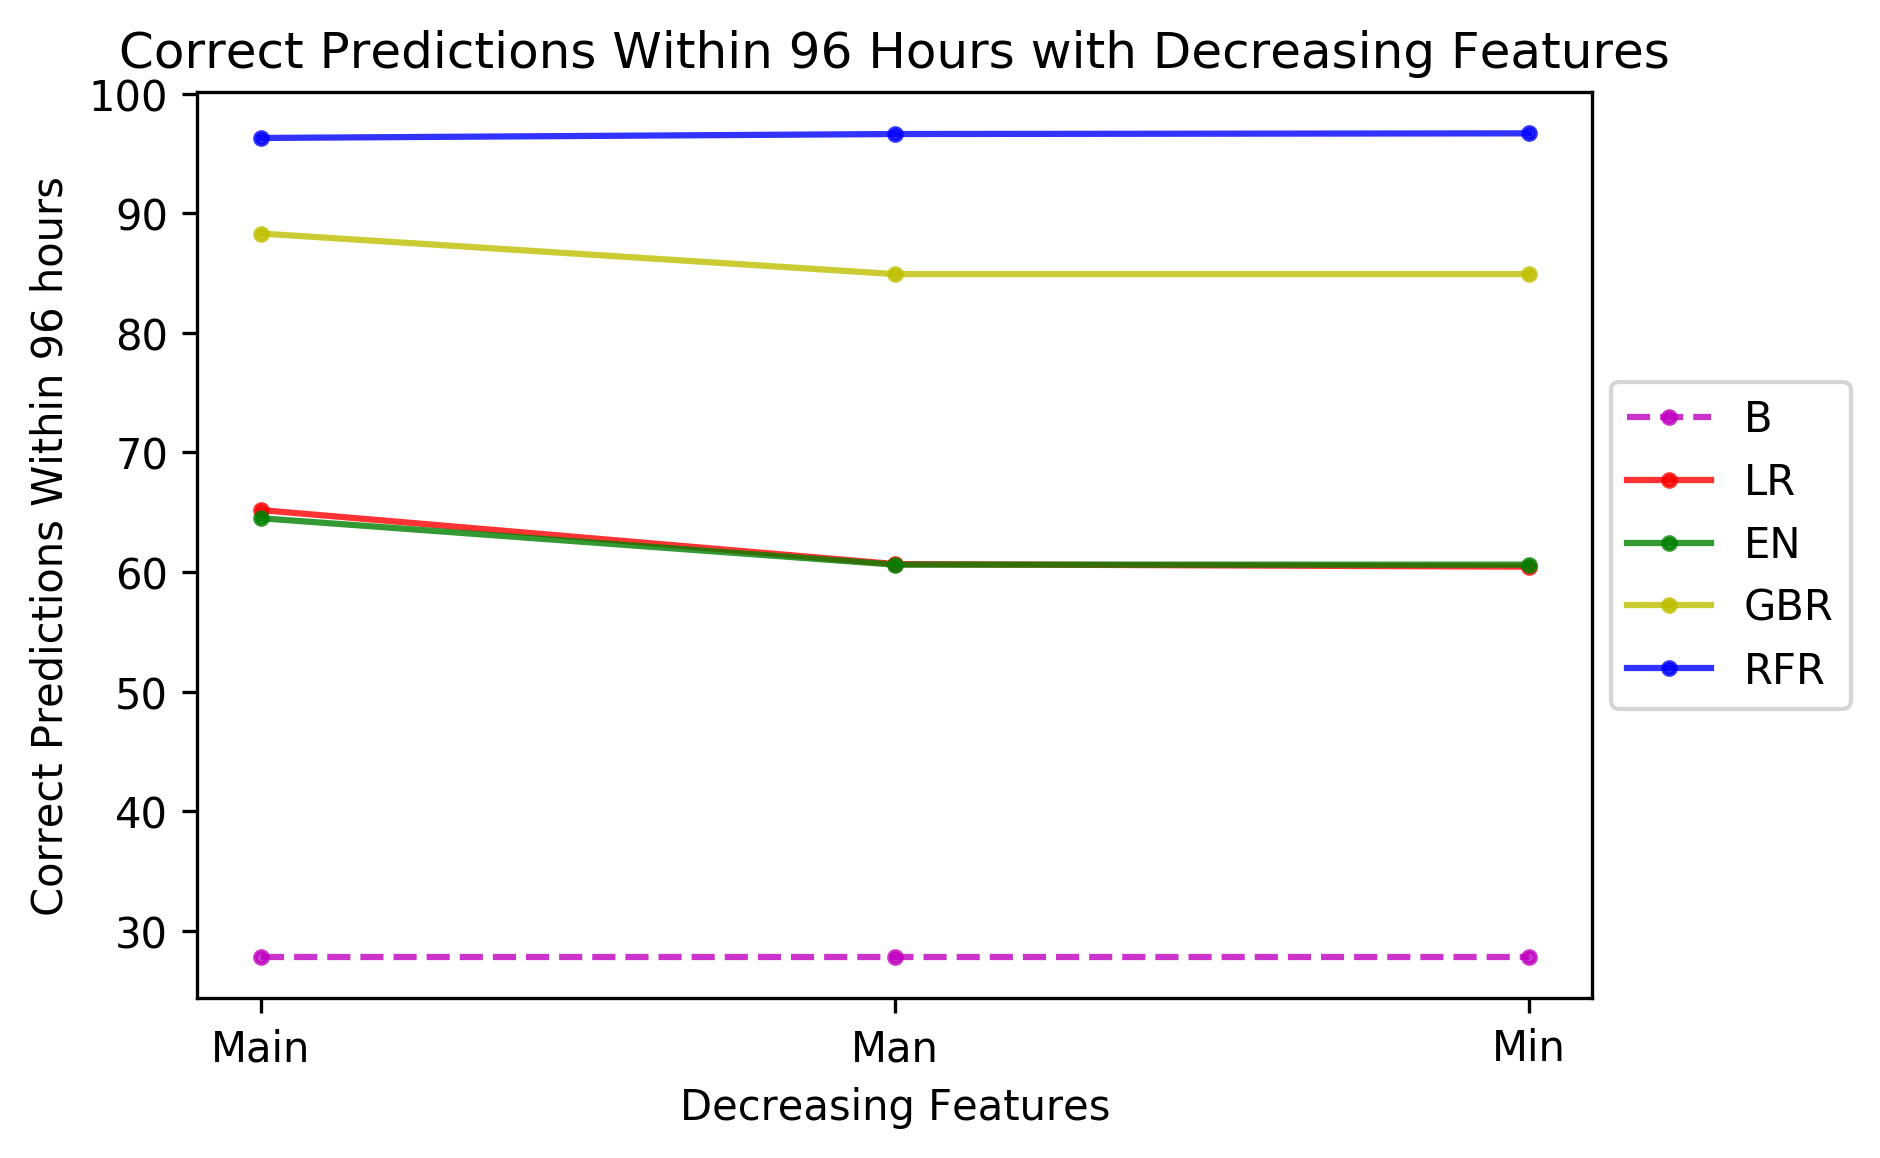

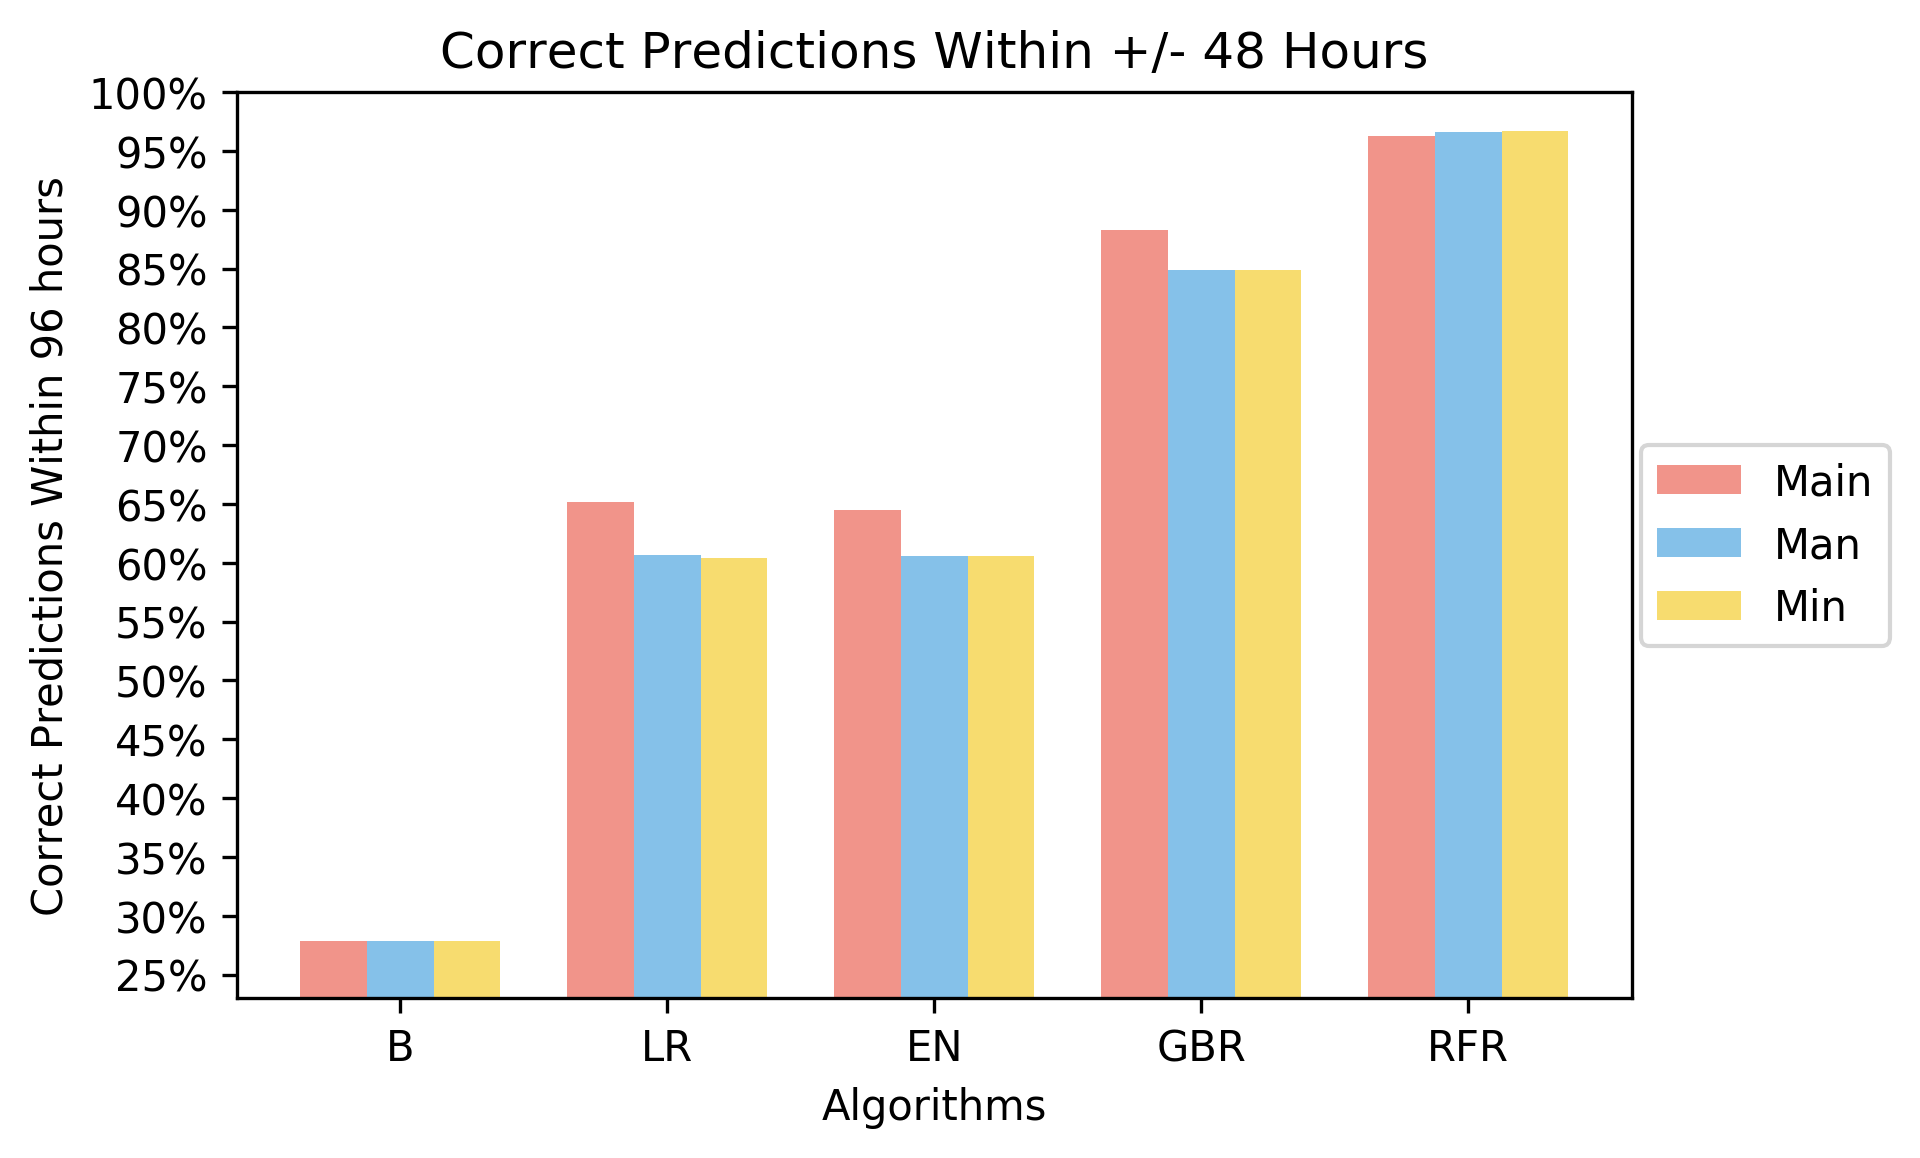

In [15]:
# print("\n..plotting pct correct..\n")
for pct_close, title in zip(df_pct_closes, input_file_names):
    multi_plot.multi_plot_pct_correct(pct_close, newpath, d, title)

# print("\n..plotting RMSE bar..\n")
if "July" in input_file_names or "June" in input_file_names:
    actual_title = "RMSE for Training and Testing Stages"
else:
    actual_title = "RMSE for each Algorithm"
multi_plot.multi_plot_RMSEs_bar(dfs_RMSEs, newpath, d, input_file_names, actual_title)

# print("\n..plotting RMSE line..\n")
dfs_RMSEs_T = np.transpose(dfs_RMSEs)
multi_plot.multi_plot_RMSEs_line(dfs_RMSEs_T, newpath, d, input_file_names)

# print("\n..plotting pct correct within 96 hours..\n")
dfs_pct_close96_T = np.transpose(dfs_pct_close96)
multi_plot.multi_plot_within96(dfs_pct_close96_T, newpath, d, input_file_names)

actual_title = "Correct Predictions Within +/- 48 Hours"
multi_plot.multi_plot_within96_bar(dfs_pct_close96, newpath, d, input_file_names, actual_title=actual_title)

# stats for Min only

In [25]:
# print(dfs_pct_close96)
# print(df_pct_closes)
# print(dfs_RMSEs)

# [[27.81618976704606, 60.45101584937772, 60.62121050952026, 84.91649824486757, 96.68474984930681]]

df_pct_closes = [[[1.7728610431514378, 3.4109846470233665, 4.669715987660887, 5.616423784703755, 6.421302698294508, 6.871609403254973, 7.318370386129135, 8.062972024252739, 9.03804559798603, 10.45633443250718, 12.254015530262738, 14.119065347658049, 15.728823174839556, 17.27475800446761, 18.586675176399677, 19.700031911498776, 20.57582526681559, 21.199872354004892, 21.66790766939687, 22.40541786334787, 23.412402935857887, 24.639222777718683, 26.17452044108783, 27.81618976704606], [4.8044534269403965, 9.977661950856293, 14.934581427507712, 19.090167712654683, 22.646526965216466, 25.58593057476155, 28.22040208488459, 30.854873595007625, 33.209233060312734, 35.76569868453711, 38.42144452717796, 40.77580399248307, 42.89614580009219, 44.90657022302592, 46.860263092578805, 48.5763925823494, 50.09396163528702, 51.671807963691805, 53.114916852817075, 54.678580292876646, 56.19969506790058, 57.67471545580257, 59.13555295535936, 60.45101584937772], [5.045562528808992, 10.101762223876893, 14.824664042832323, 19.278090983228736, 22.73517001737404, 25.780945289508207, 28.525334184306633, 31.088891252703615, 33.5460766585115, 36.15218239194412, 38.634187852356135, 41.126830479027056, 43.42800411303762, 45.4987058114385, 47.48076445768181, 49.11179661738113, 50.73928305499415, 52.161117611601604, 53.69996099705705, 55.11115838740559, 56.51526433358154, 58.043470552778075, 59.40857355600468, 60.62121050952026], [7.885685919937595, 15.409708187072296, 22.387689252916356, 28.706166010708078, 34.51405878807219, 40.027656632273164, 44.77892422791901, 49.08697656277701, 52.91281069389782, 56.17132929121016, 59.24192461794845, 62.266425557564794, 64.87607701308372, 67.39708541644505, 69.77271921426798, 72.05261851576074, 74.23678332092331, 76.11956174875013, 77.84987412686594, 79.32844023685423, 80.84955501187817, 82.32457539978016, 83.66485834840265, 84.91649824486757], [51.32787292132043, 66.97869021026132, 74.69418147005638, 79.45608623196114, 82.7465163280502, 85.14342445839095, 87.0474772187356, 88.66787221217601, 89.92660355281353, 90.93358862532355, 91.84838492358969, 92.56107506293657, 93.14257348509024, 93.64606602134525, 94.0680069496153, 94.47221926745382, 94.87288586320605, 95.1920008509733, 95.54302733751729, 95.7983193277311, 96.02169981916818, 96.28053753146828, 96.50391802290537, 96.68474984930681]]]


..plotting pct correct..

trying


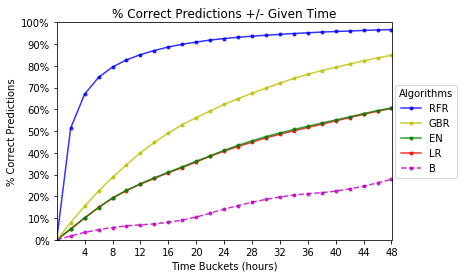

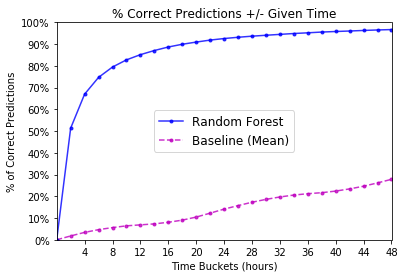

In [66]:
print("\n..plotting pct correct..\n")
for pct_close, title in zip(df_pct_closes, input_file_names):
    multi_plot_pct_correct(pct_close, newpath, d, title)

# Barplot RMSE for Min only

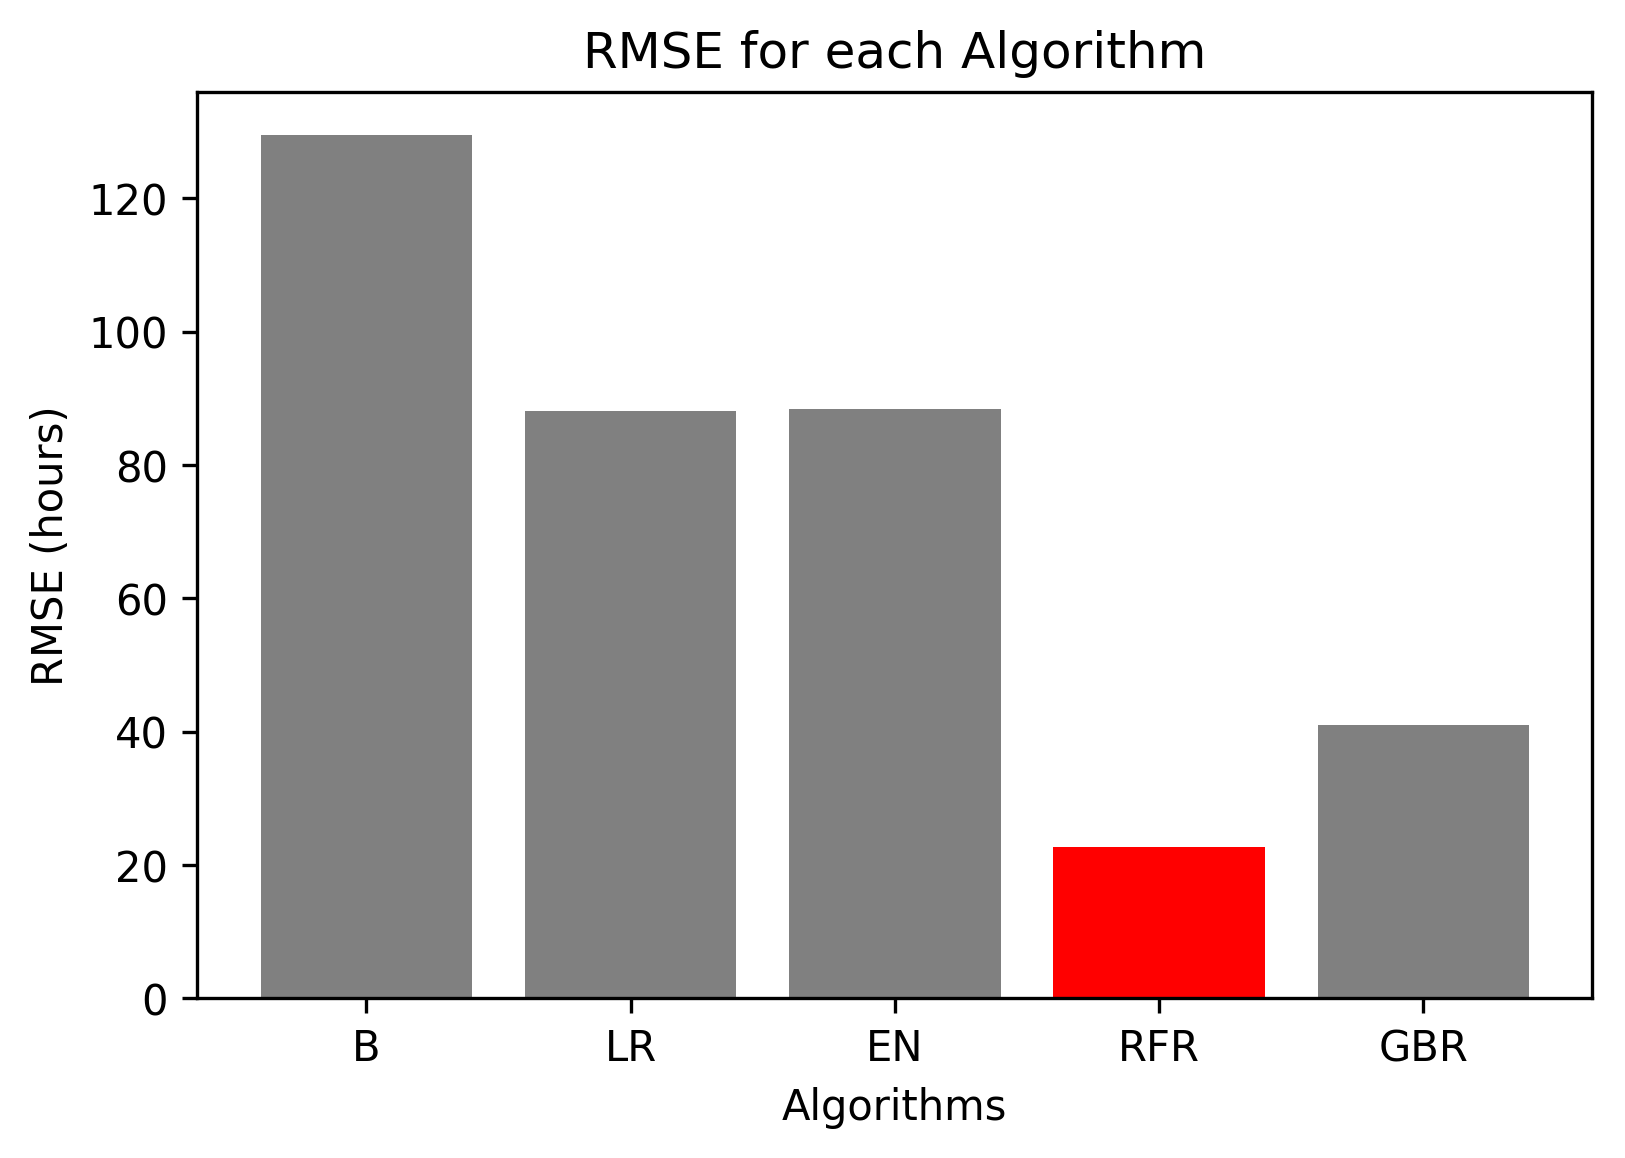

In [31]:
y = [129.46, 88.11, 88.33, 22.66, 40.95]
x = ["B", "LR", "EN", "RFR", "GBR"]
fig, ax = plt.subplots(dpi=300)
clrs = ['grey' if (x > min(y)) else 'red' for x in y]
plt.bar([x for x in range(len(y))], y, color=clrs)
plt.title("RMSE for each Algorithm")
plt.ylabel("RMSE (hours)")
plt.xlabel("Algorithms")
plt.xticks([x for x in range(len(x))], x)
plt.savefig("%s/grey_and_red_RMSE_for_each_algorithm.png"%newpath, dpi=500)
plt.show()

# Plots for Pre-June and June

In [53]:
parameters = "../../../Data/parameters.txt"  # Parameters file
sample_parameters = "../Sample Parameter File/parameters.txt"

d = multi_plot.get_parameters(parameters)

newpath = r"../0. Results/" + d["user"] + "/Evaluation/multi_plot/prejune_june/"
if not os.path.exists(newpath):
    os.makedirs(newpath)  # Make folder for storing results if it does not exist

copyfile(parameters, newpath + "parameters.txt")  # Save parameters
np.random.seed(int(d["seed"]))  # Set seed

In [54]:
d["input_files"] = ["man_Pre-June_predictions", "man_June_predictions"]
d["input_file_names"] = ["PreJune", "June"]

dfs = []
if type(d["input_files"]) == str:
    dfs.append(multi_plot.get_dfs(d, None))
    print("df shape : " , dfs[0].shape)
    input_file_names = [d["input_file_names"]]
else:
    for i in range(len(d["input_files"])):
        dfs.append(multi_plot.get_dfs(d, i))
        print("dfs[%s] shape : " % i, dfs[i].shape)
    input_file_names = d["input_file_names"]

dfs[0] shape :  (15406, 41)
dfs[1] shape :  (8401, 41)


In [55]:
dfs_pct_close96 = []
df_pct_closes = []
dfs_RMSEs = []

for i, df in enumerate(dfs):
    percent_close, number_close96, RMSEs = multi_plot.get_stats(df)
    dfs_pct_close96.append(number_close96)
    dfs_RMSEs.append(RMSEs)
    df_pct_closes.append(percent_close) # for 1 df

In [44]:
import imp  
imp.reload(multi_plot)  

<module 'multi_plot' from 'C:\\Users\\Ross\\Desktop\\k python\\Predicting-Transaction-Times\\6. Version01\\5. Evaluation\\multi_plot.py'>

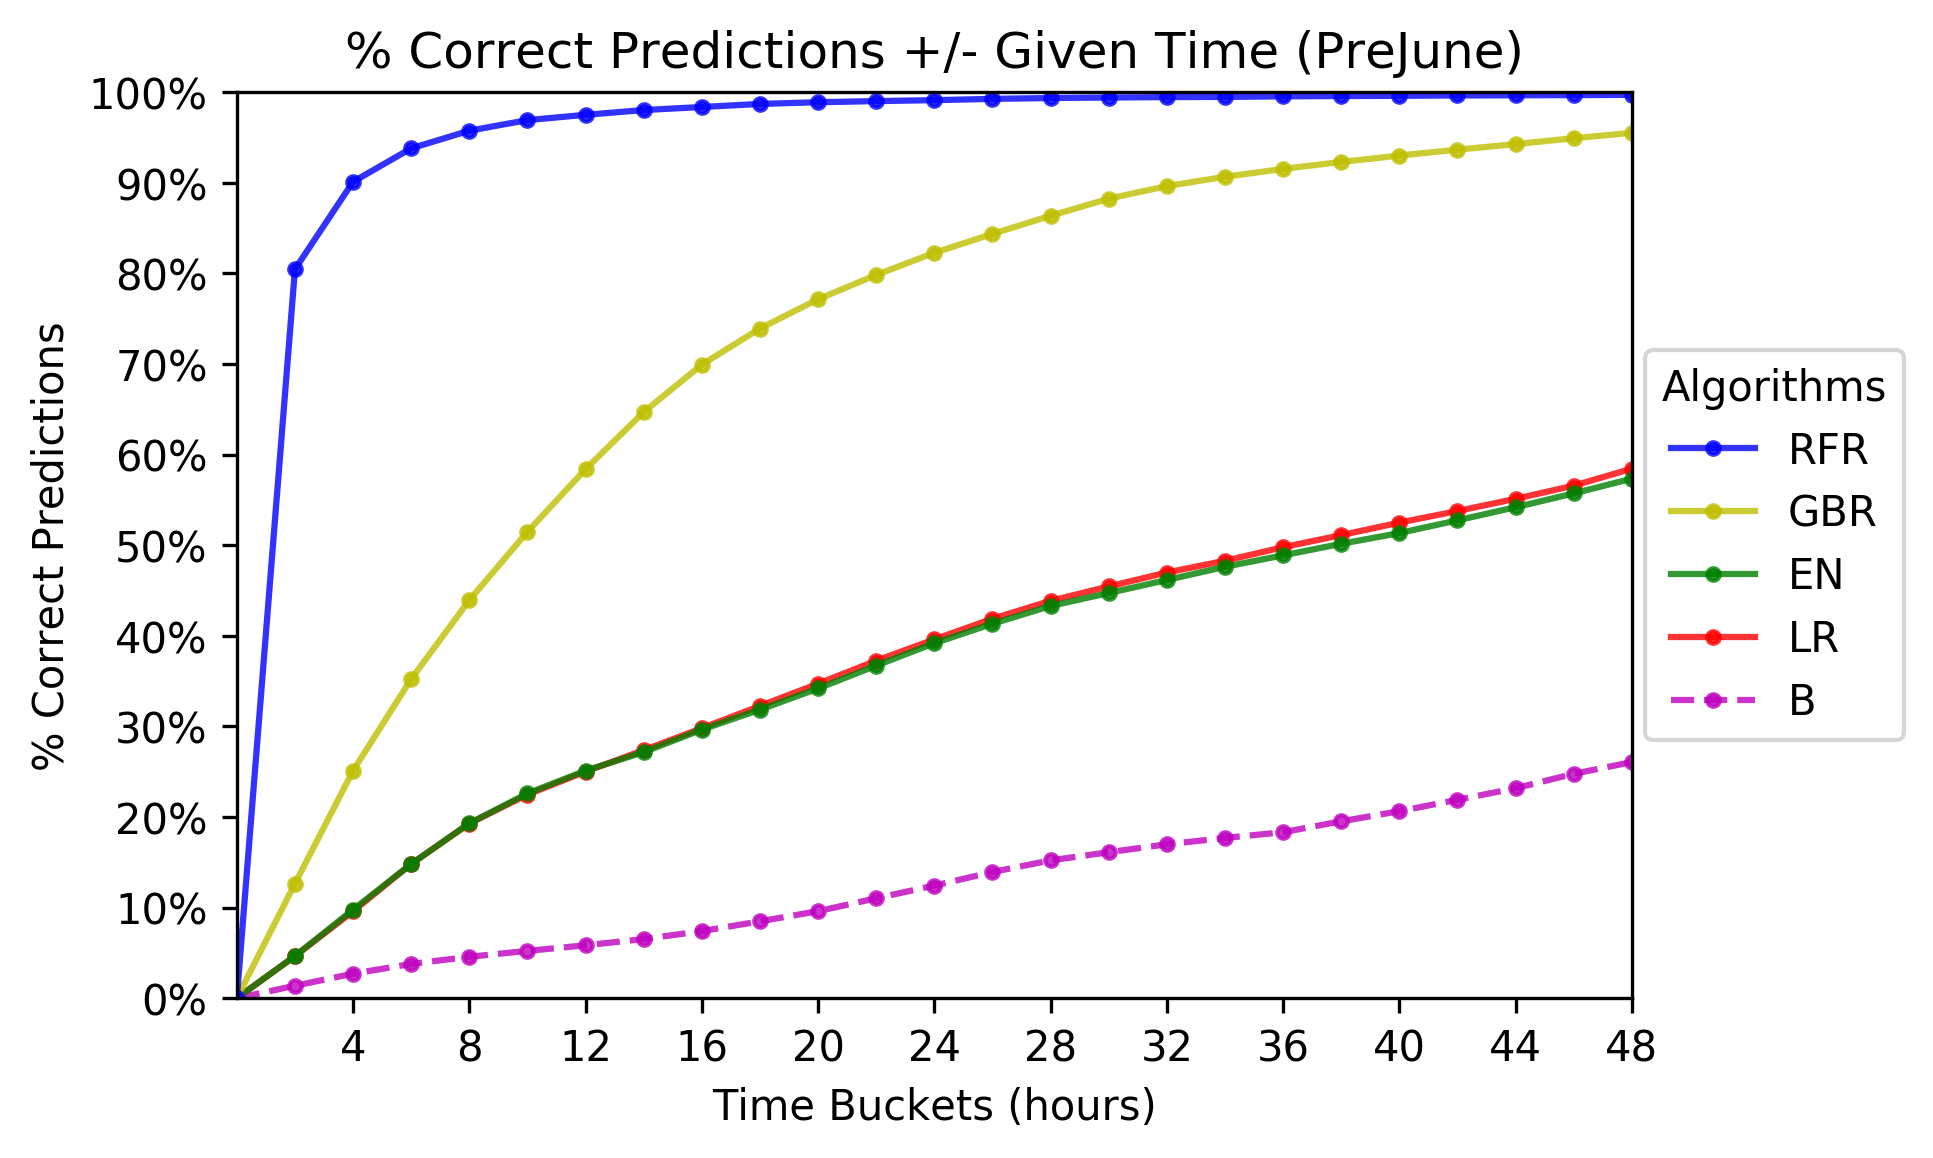

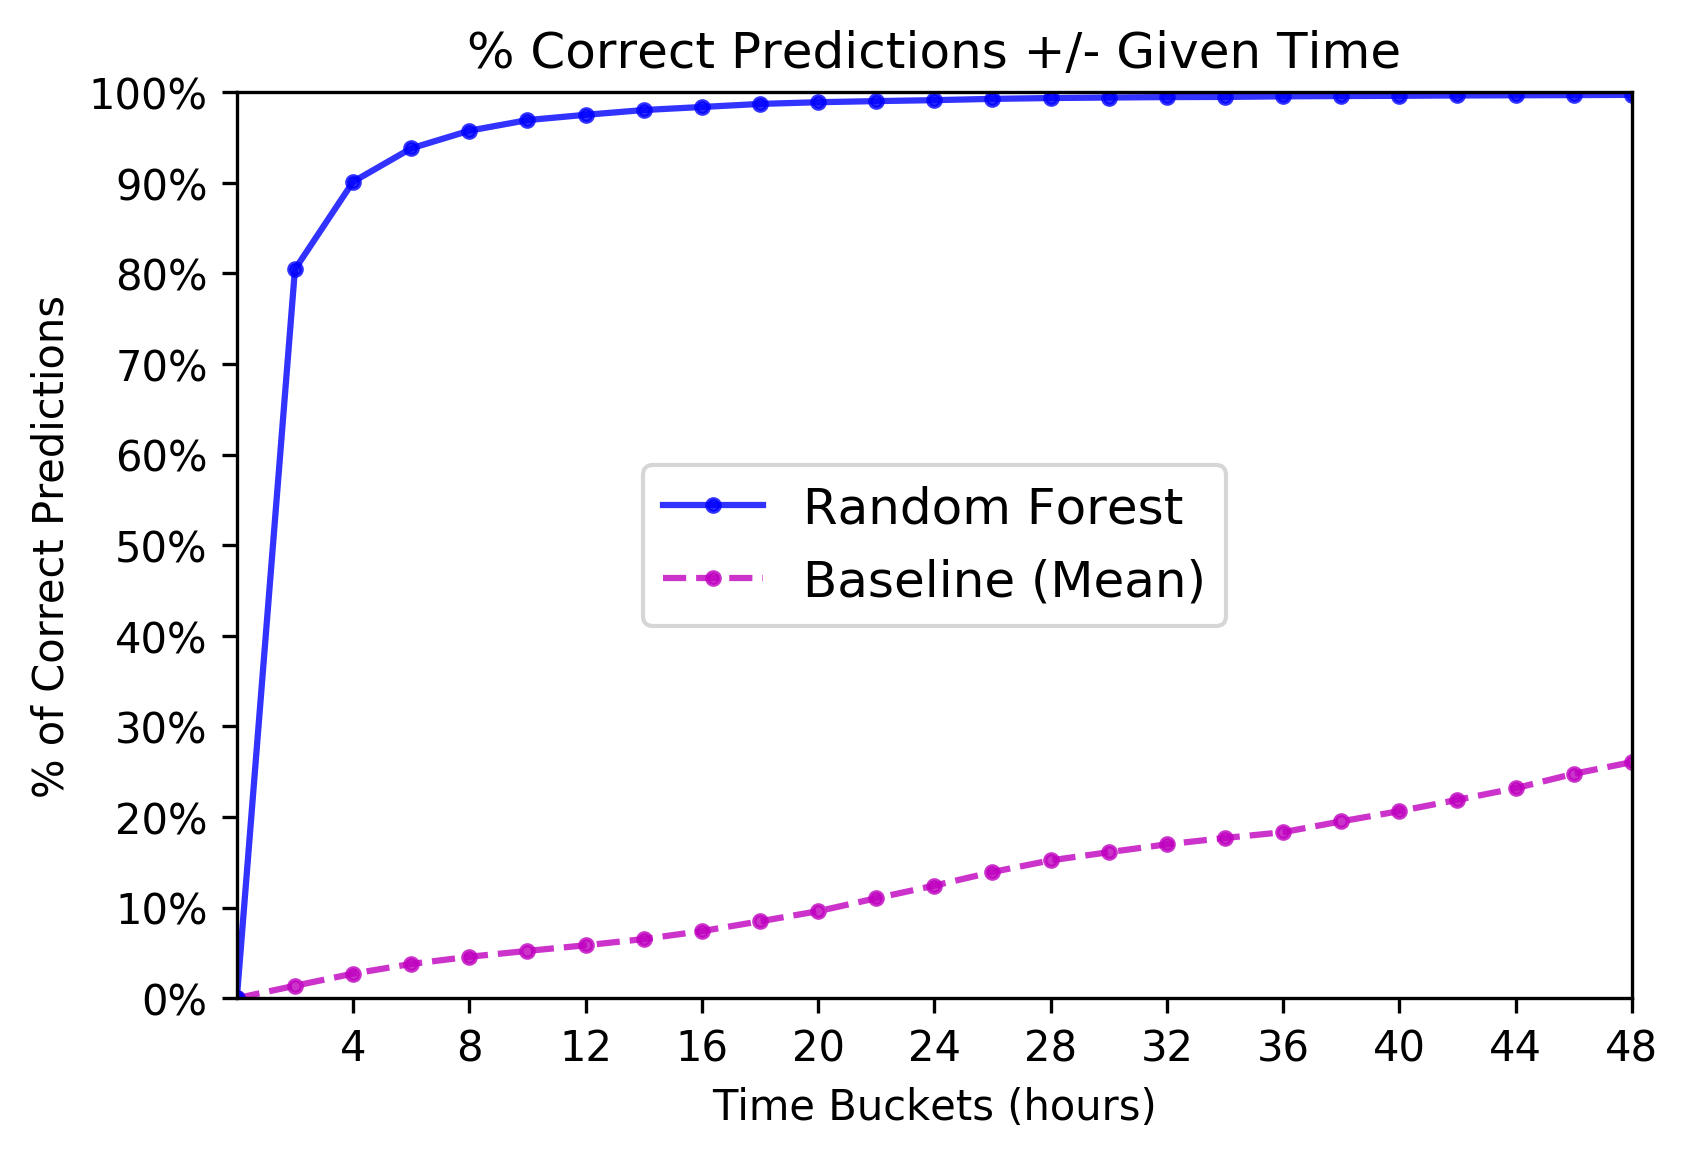

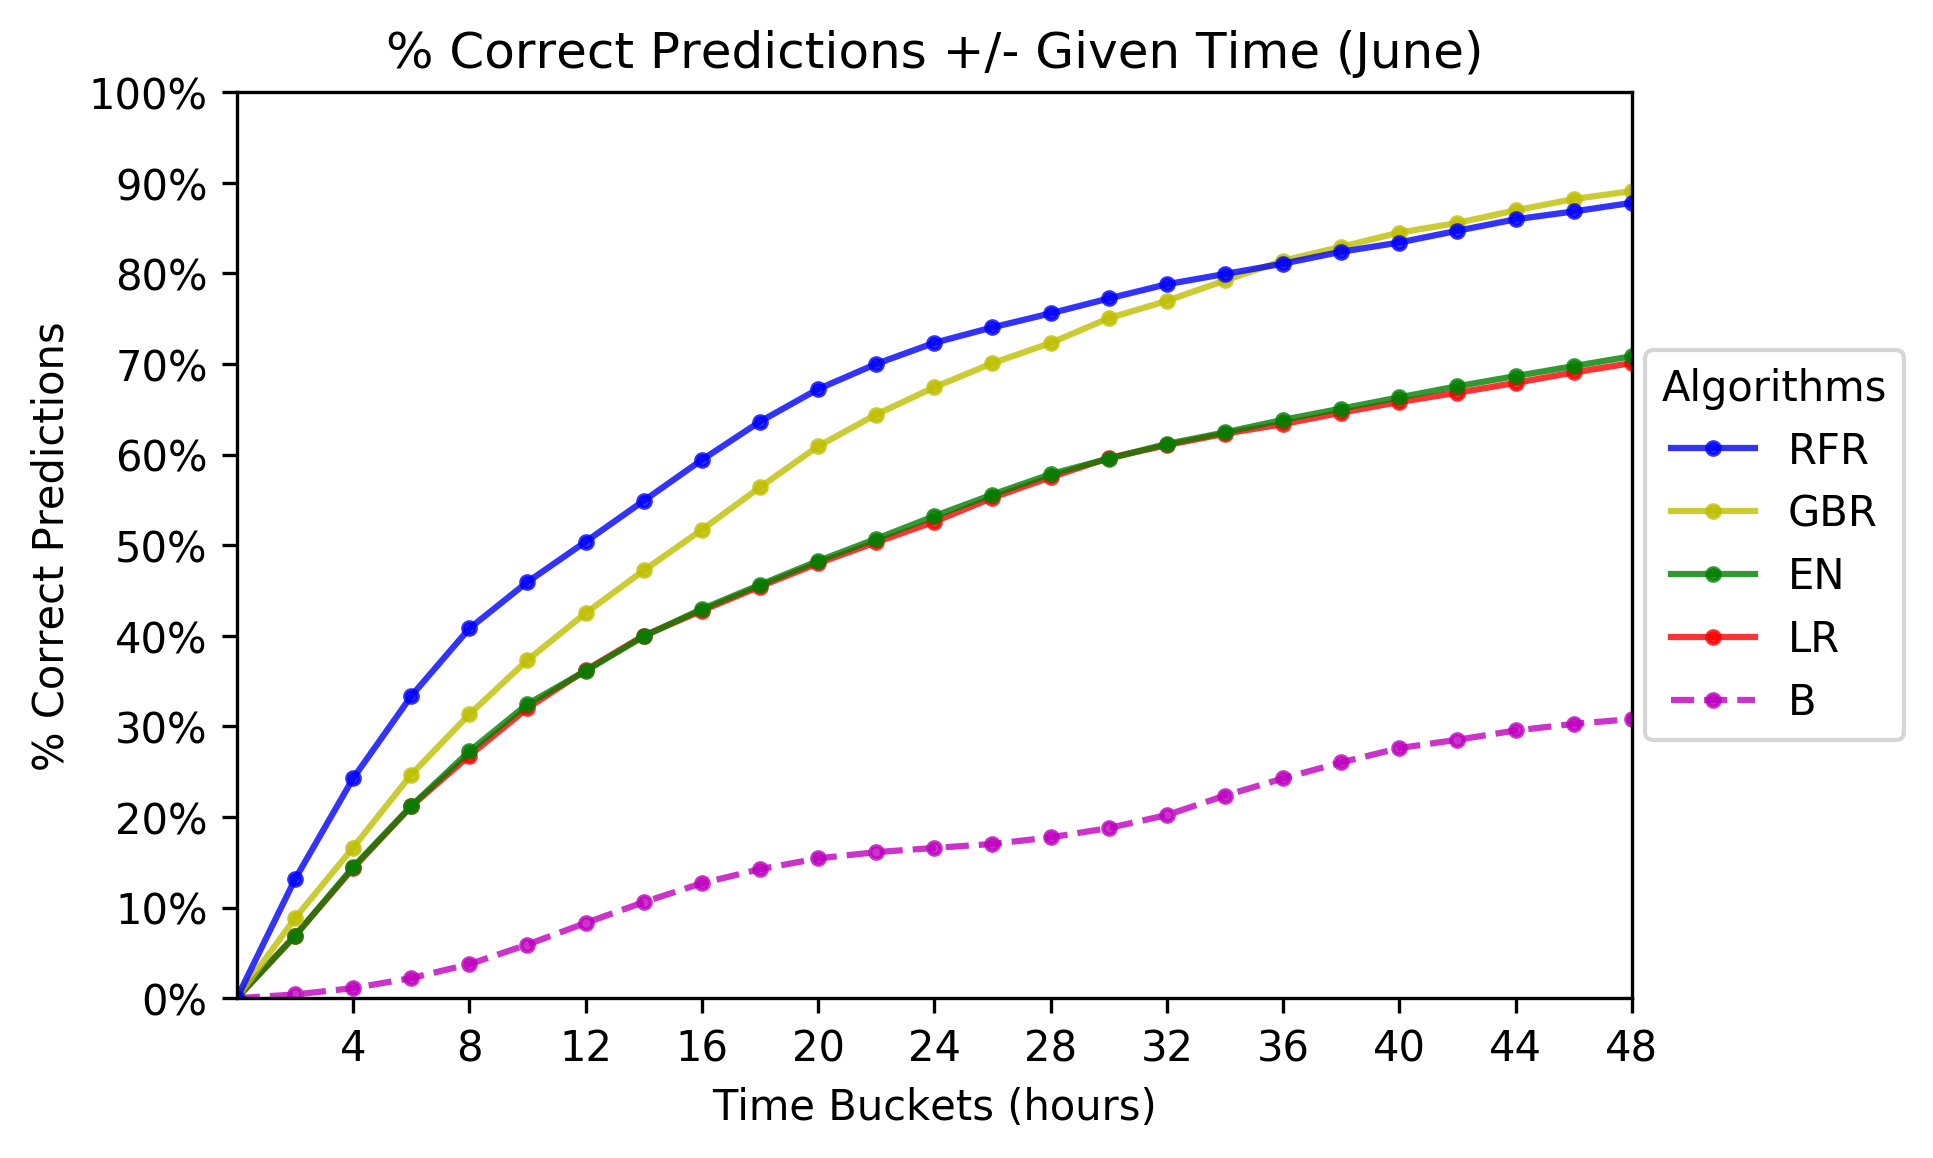

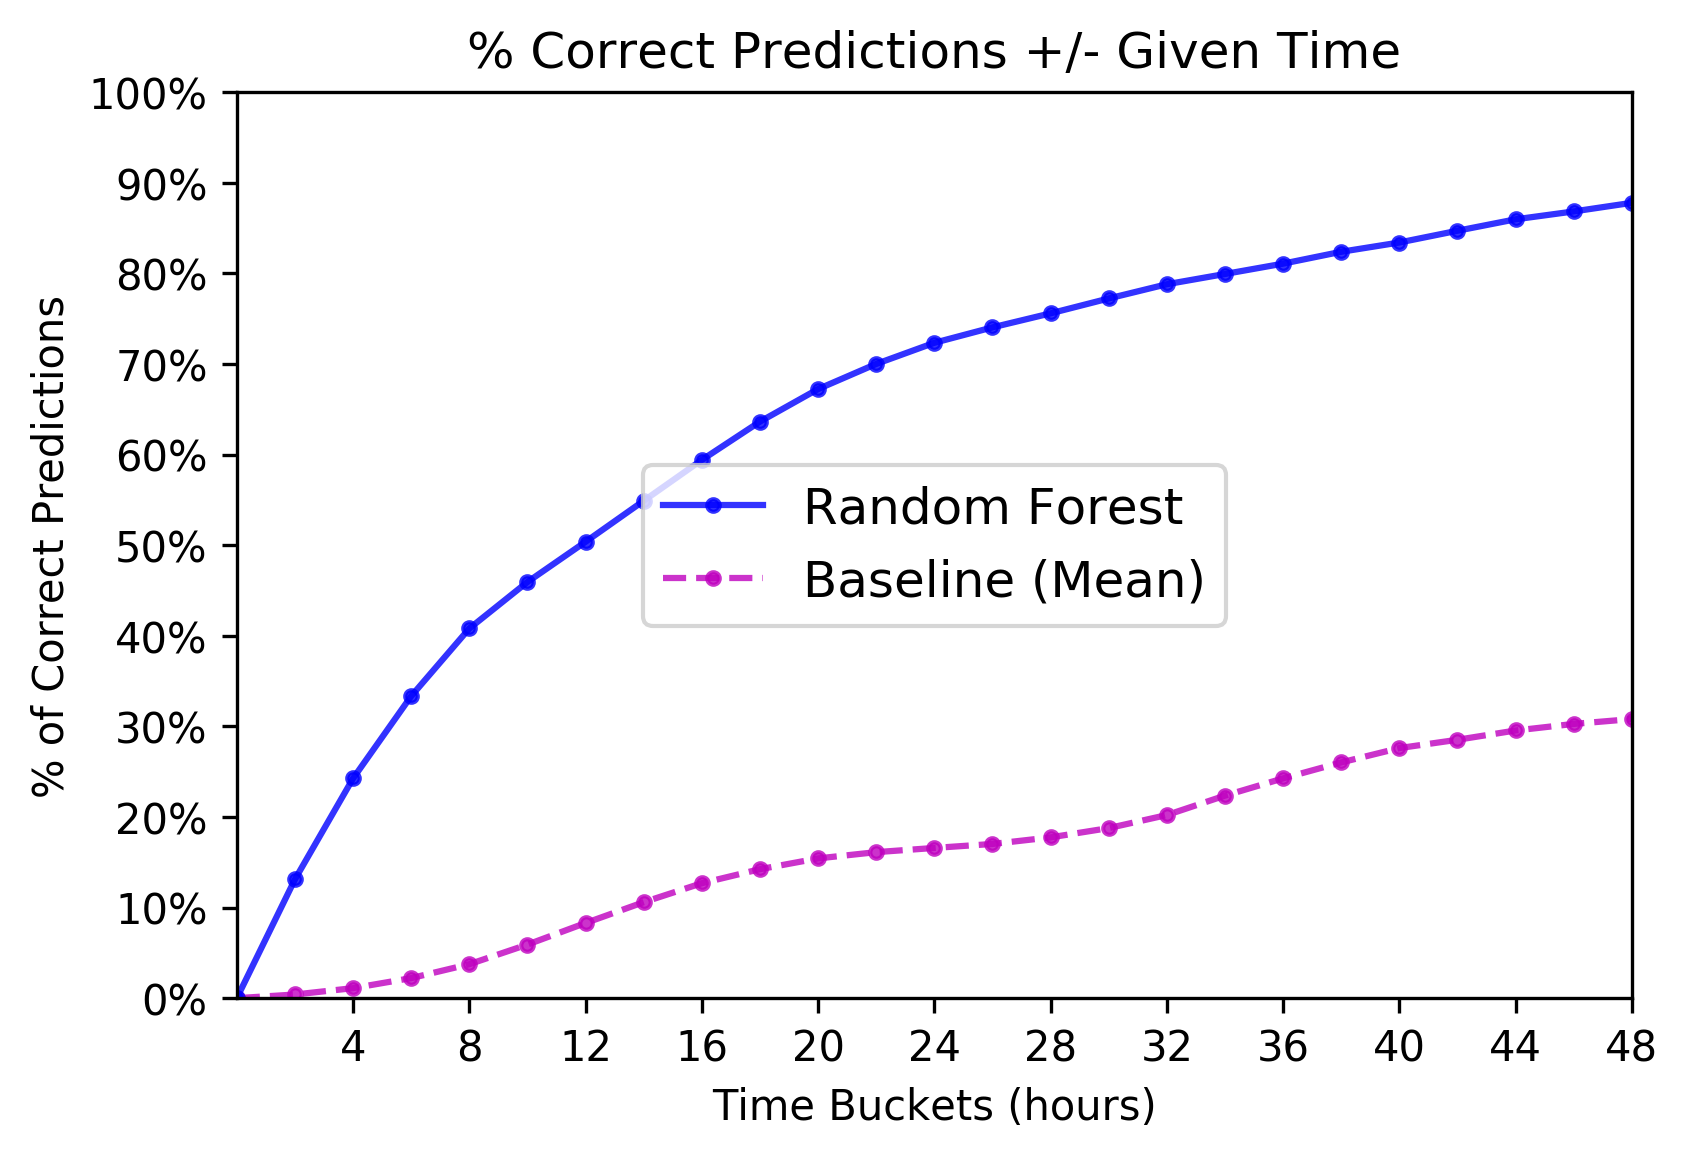

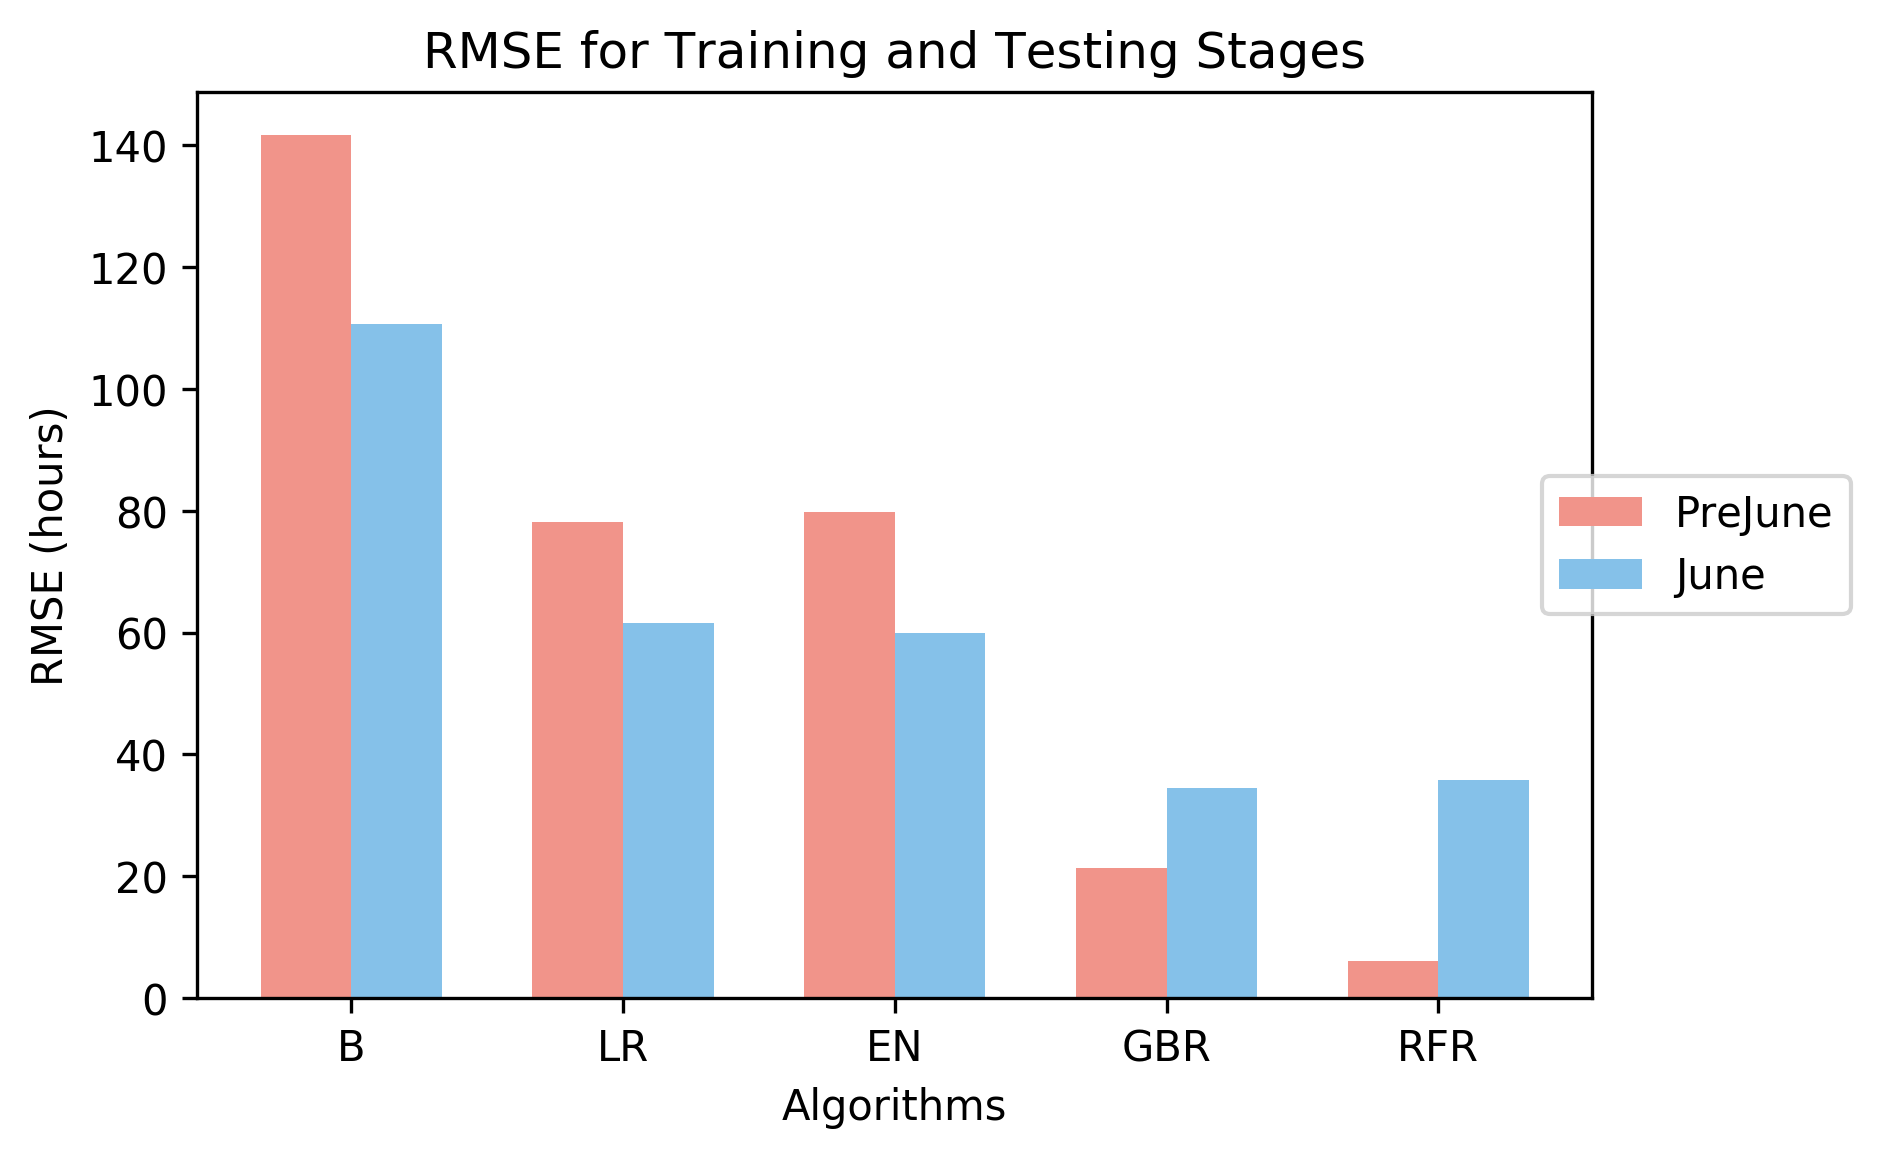

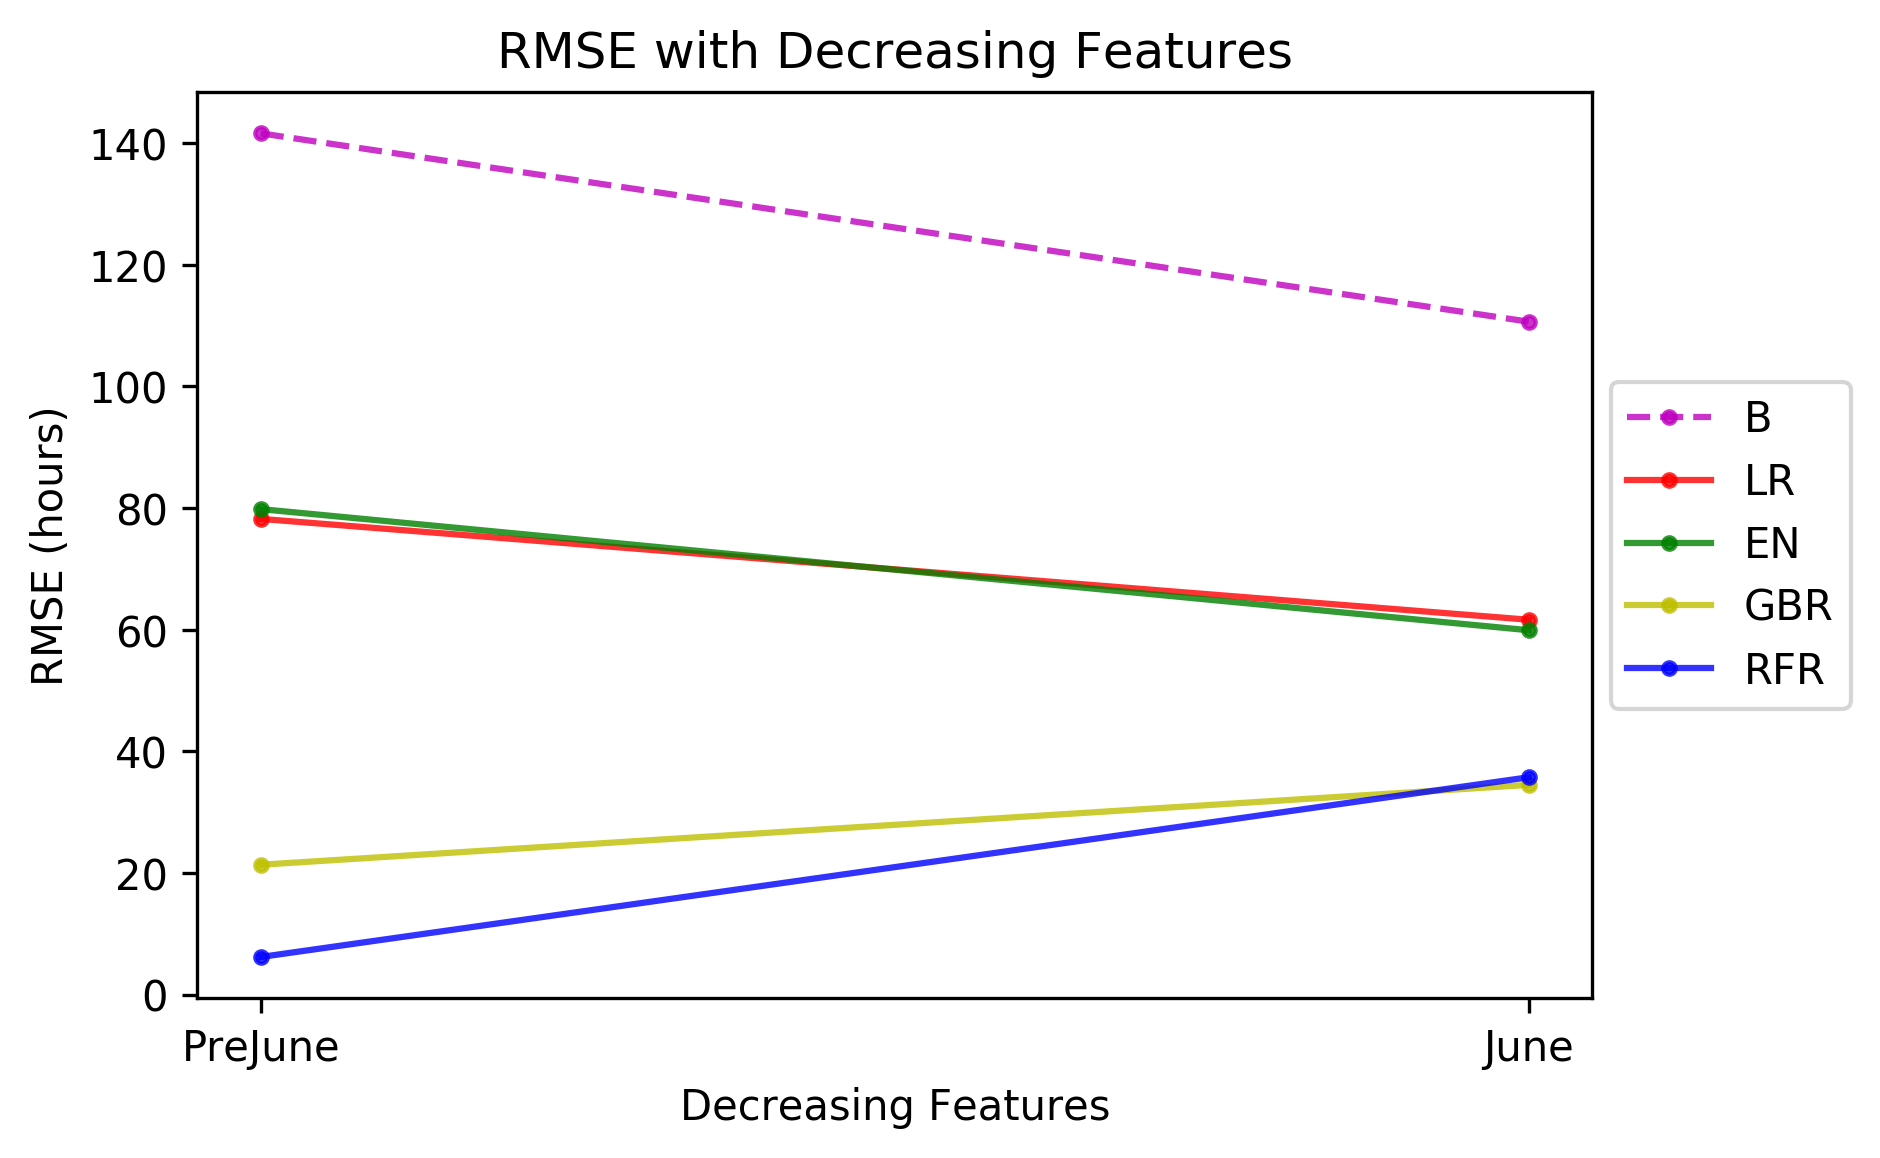

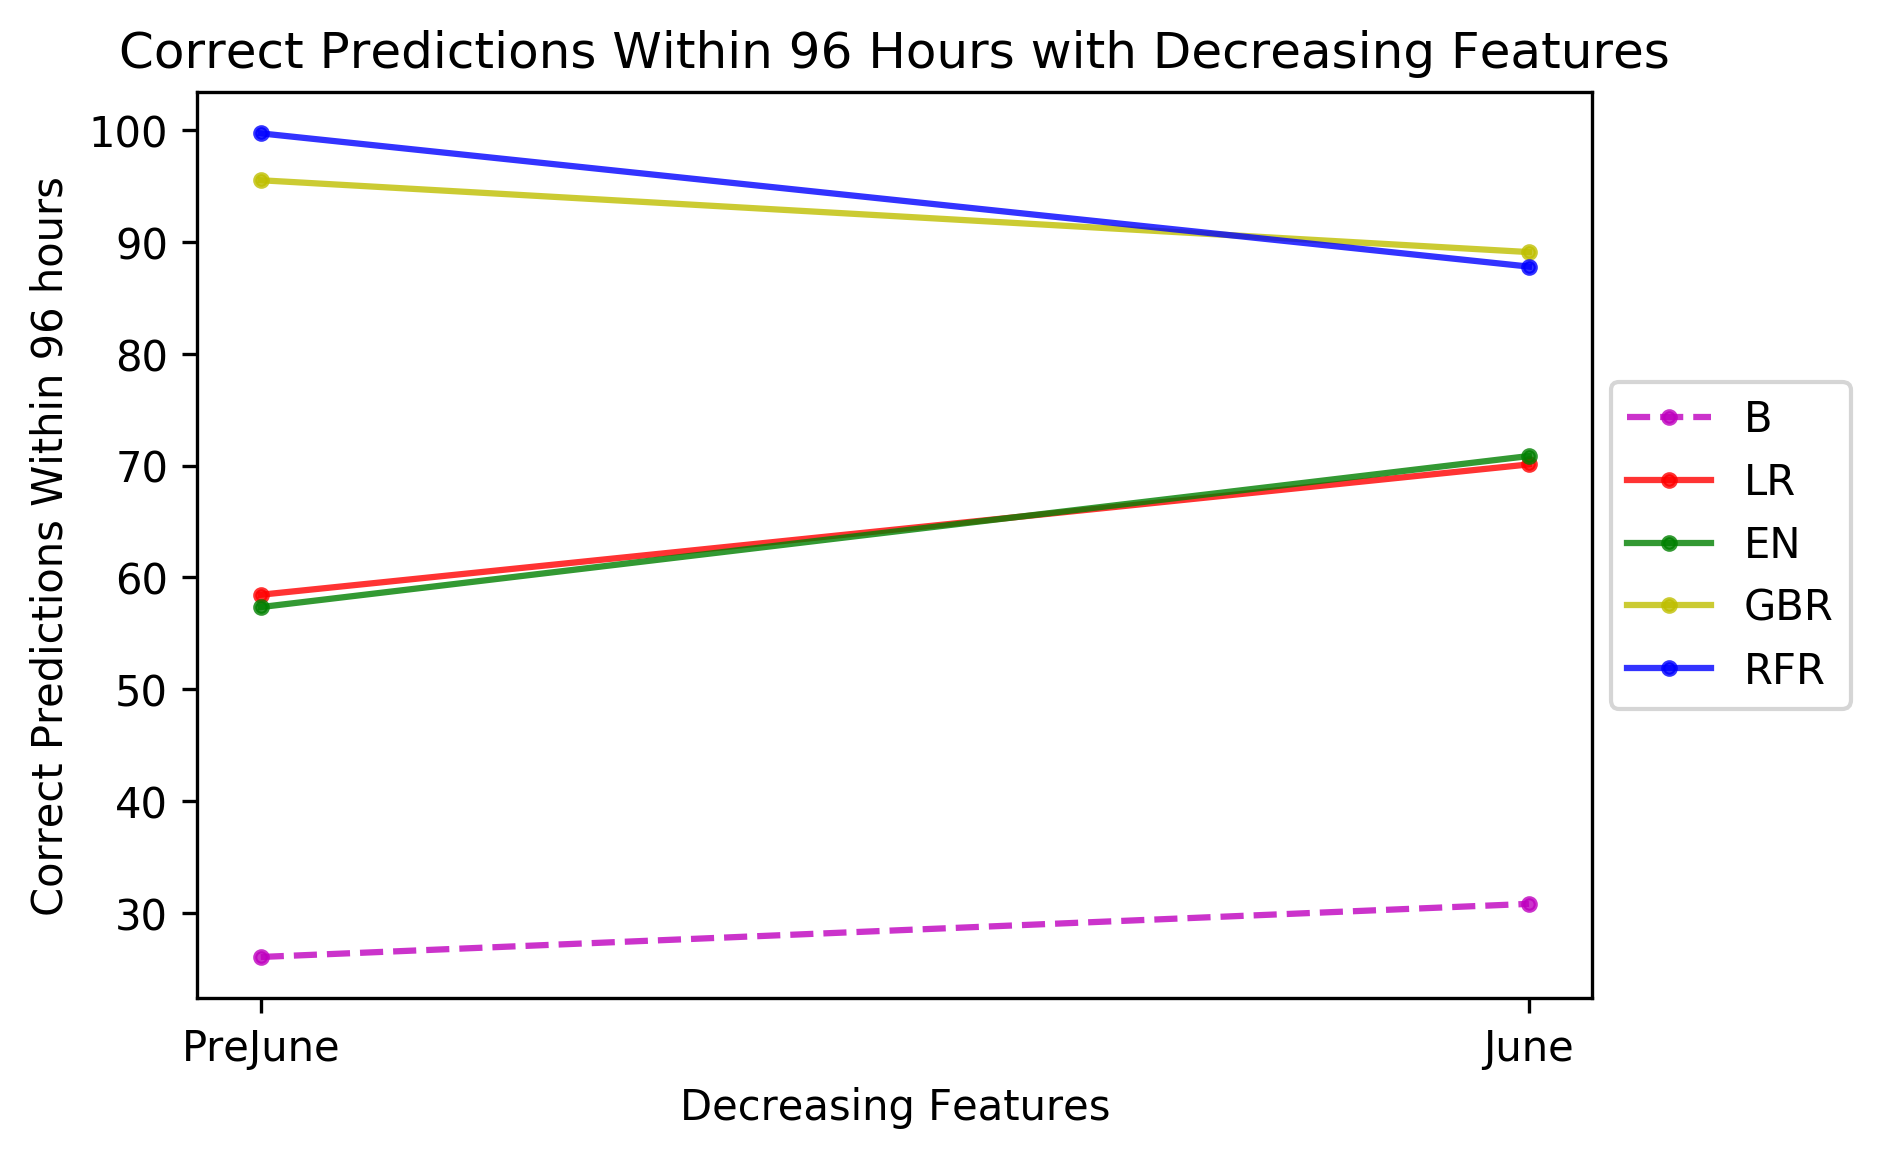

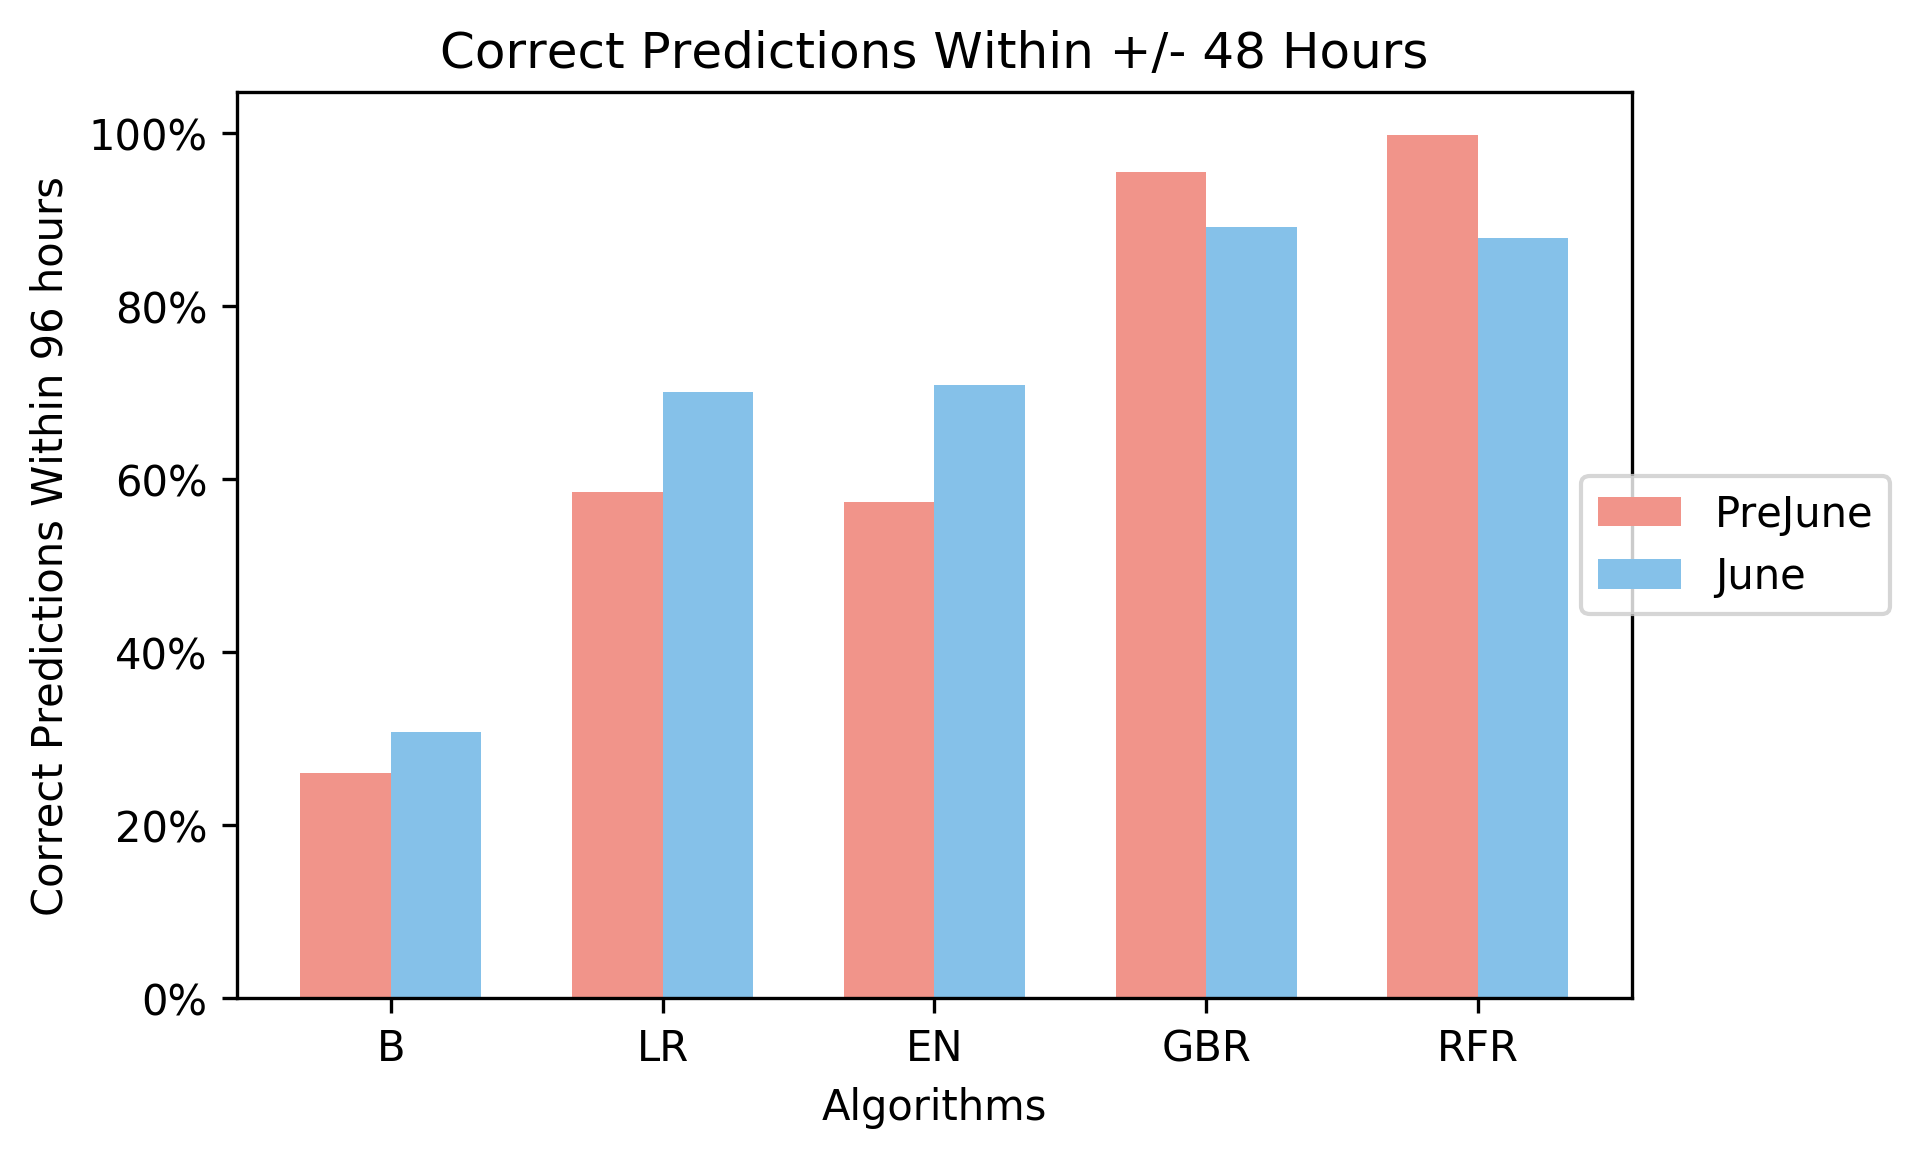

In [56]:
# print("\n..plotting pct correct..\n")
for pct_close, title in zip(df_pct_closes, input_file_names):
    multi_plot.multi_plot_pct_correct(pct_close, newpath, d, title)

# print("\n..plotting RMSE bar..\n")
if "July" in input_file_names or "June" in input_file_names:
    actual_title = "RMSE for Training and Testing Stages"
else:
    actual_title = "RMSE for each Algorithm"
multi_plot.multi_plot_RMSEs_bar(dfs_RMSEs, newpath, d, input_file_names, actual_title)

# print("\n..plotting RMSE line..\n")
dfs_RMSEs_T = np.transpose(dfs_RMSEs)
multi_plot.multi_plot_RMSEs_line(dfs_RMSEs_T, newpath, d, input_file_names)

# print("\n..plotting pct correct within 96 hours..\n")
dfs_pct_close96_T = np.transpose(dfs_pct_close96)
multi_plot.multi_plot_within96(dfs_pct_close96_T, newpath, d, input_file_names)

actual_title = "Correct Predictions Within +/- 48 Hours"
multi_plot.multi_plot_within96_bar(dfs_pct_close96, newpath, d, input_file_names, actual_title=actual_title)

# PreJuly July

In [57]:
parameters = "../../../Data/parameters.txt"  # Parameters file
sample_parameters = "../Sample Parameter File/parameters.txt"

d = multi_plot.get_parameters(parameters)

newpath = r"../0. Results/" + d["user"] + "/Evaluation/multi_plot/prejuly_july/"
if not os.path.exists(newpath):
    os.makedirs(newpath)  # Make folder for storing results if it does not exist

copyfile(parameters, newpath + "parameters.txt")  # Save parameters
np.random.seed(int(d["seed"]))  # Set seed

In [58]:
d["input_files"] = ["man_Pre-July_predictions", "man_July_predictions"]
d["input_file_names"] = ["PreJuly", "July"]

dfs = []
if type(d["input_files"]) == str:
    dfs.append(multi_plot.get_dfs(d, None))
    print("df shape : " , dfs[0].shape)
    input_file_names = [d["input_file_names"]]
else:
    for i in range(len(d["input_files"])):
        dfs.append(multi_plot.get_dfs(d, i))
        print("dfs[%s] shape : " % i, dfs[i].shape)
    input_file_names = d["input_file_names"]

dfs[0] shape :  (23807, 41)
dfs[1] shape :  (3237, 41)


In [59]:
dfs_pct_close96 = []
df_pct_closes = []
dfs_RMSEs = []

for i, df in enumerate(dfs):
    percent_close, number_close96, RMSEs = multi_plot.get_stats(df)
    dfs_pct_close96.append(number_close96)
    dfs_RMSEs.append(RMSEs)
    df_pct_closes.append(percent_close) # for 1 df

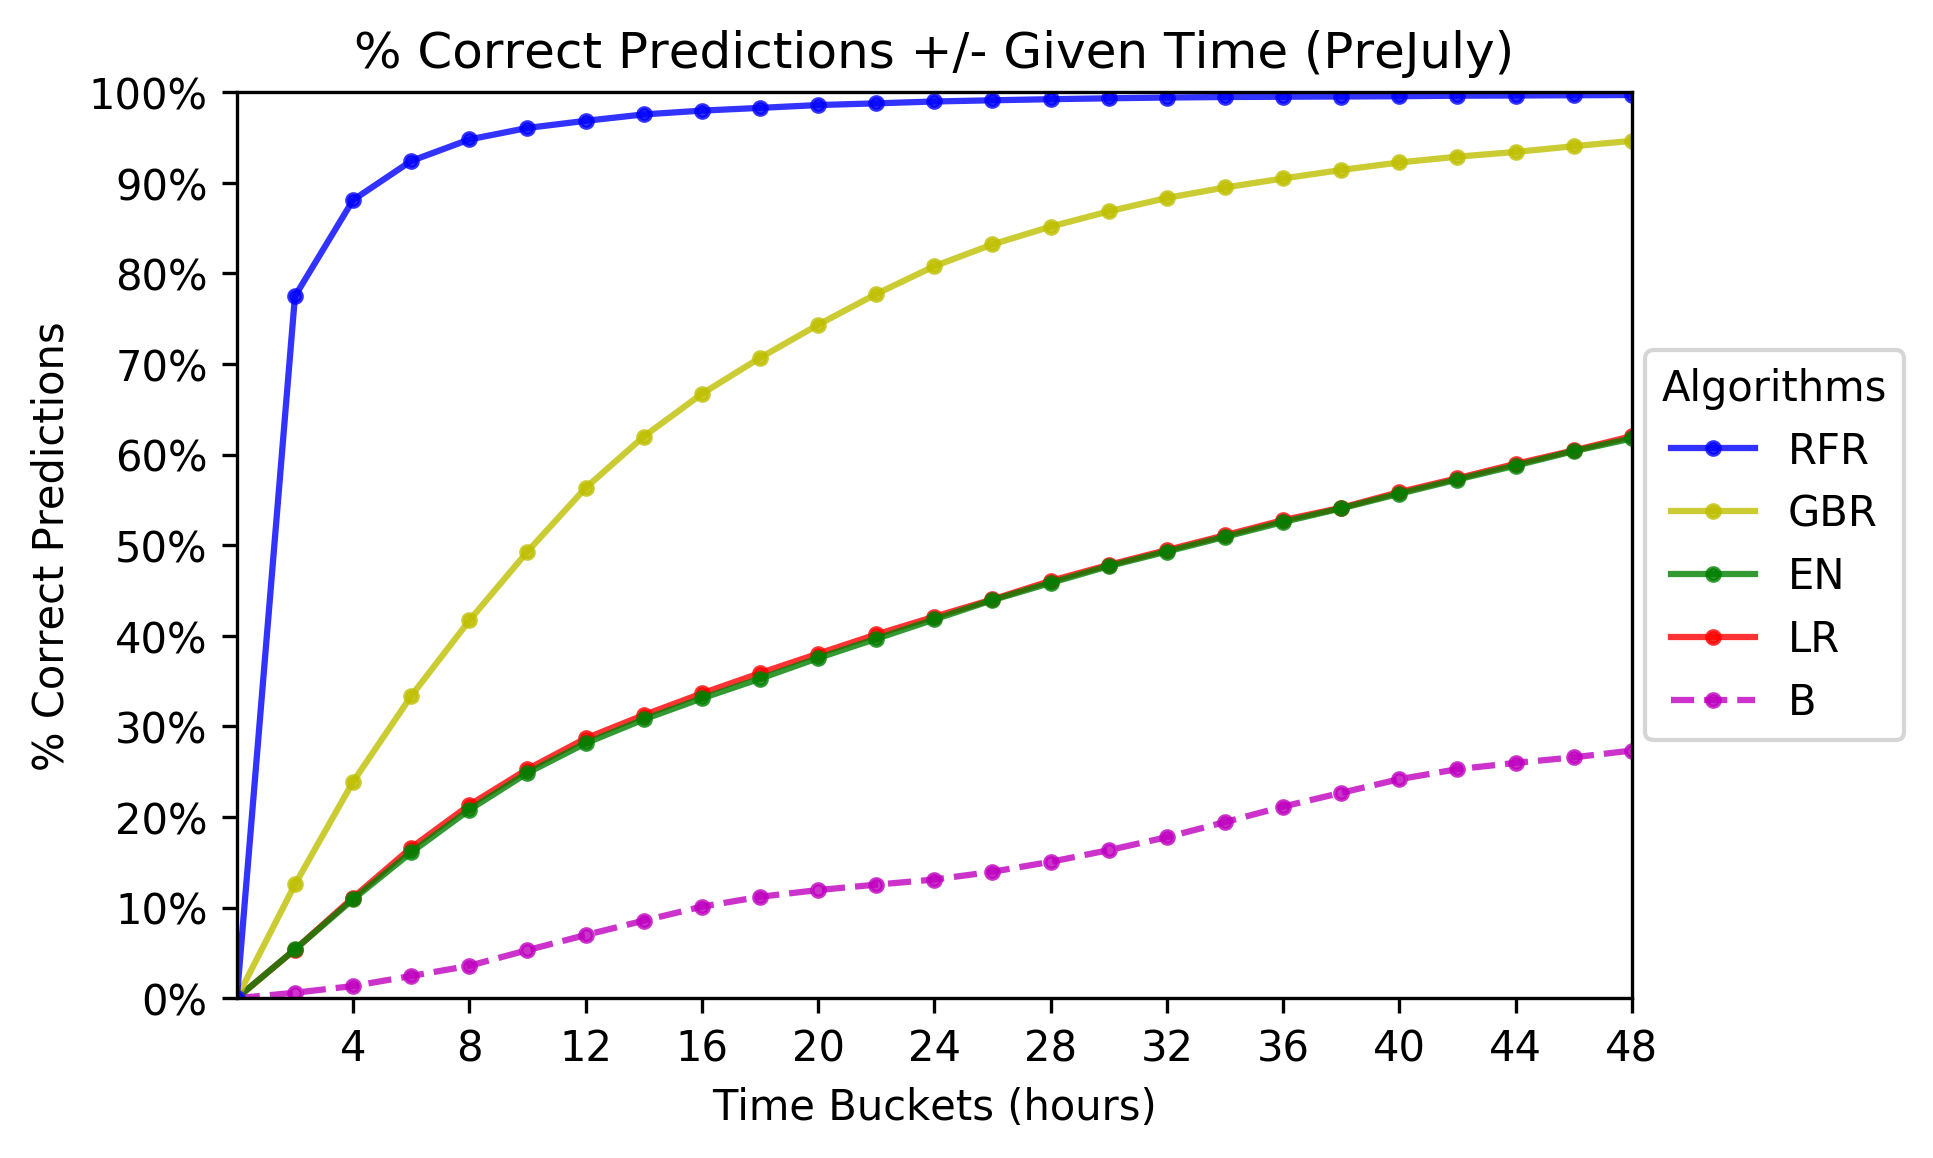

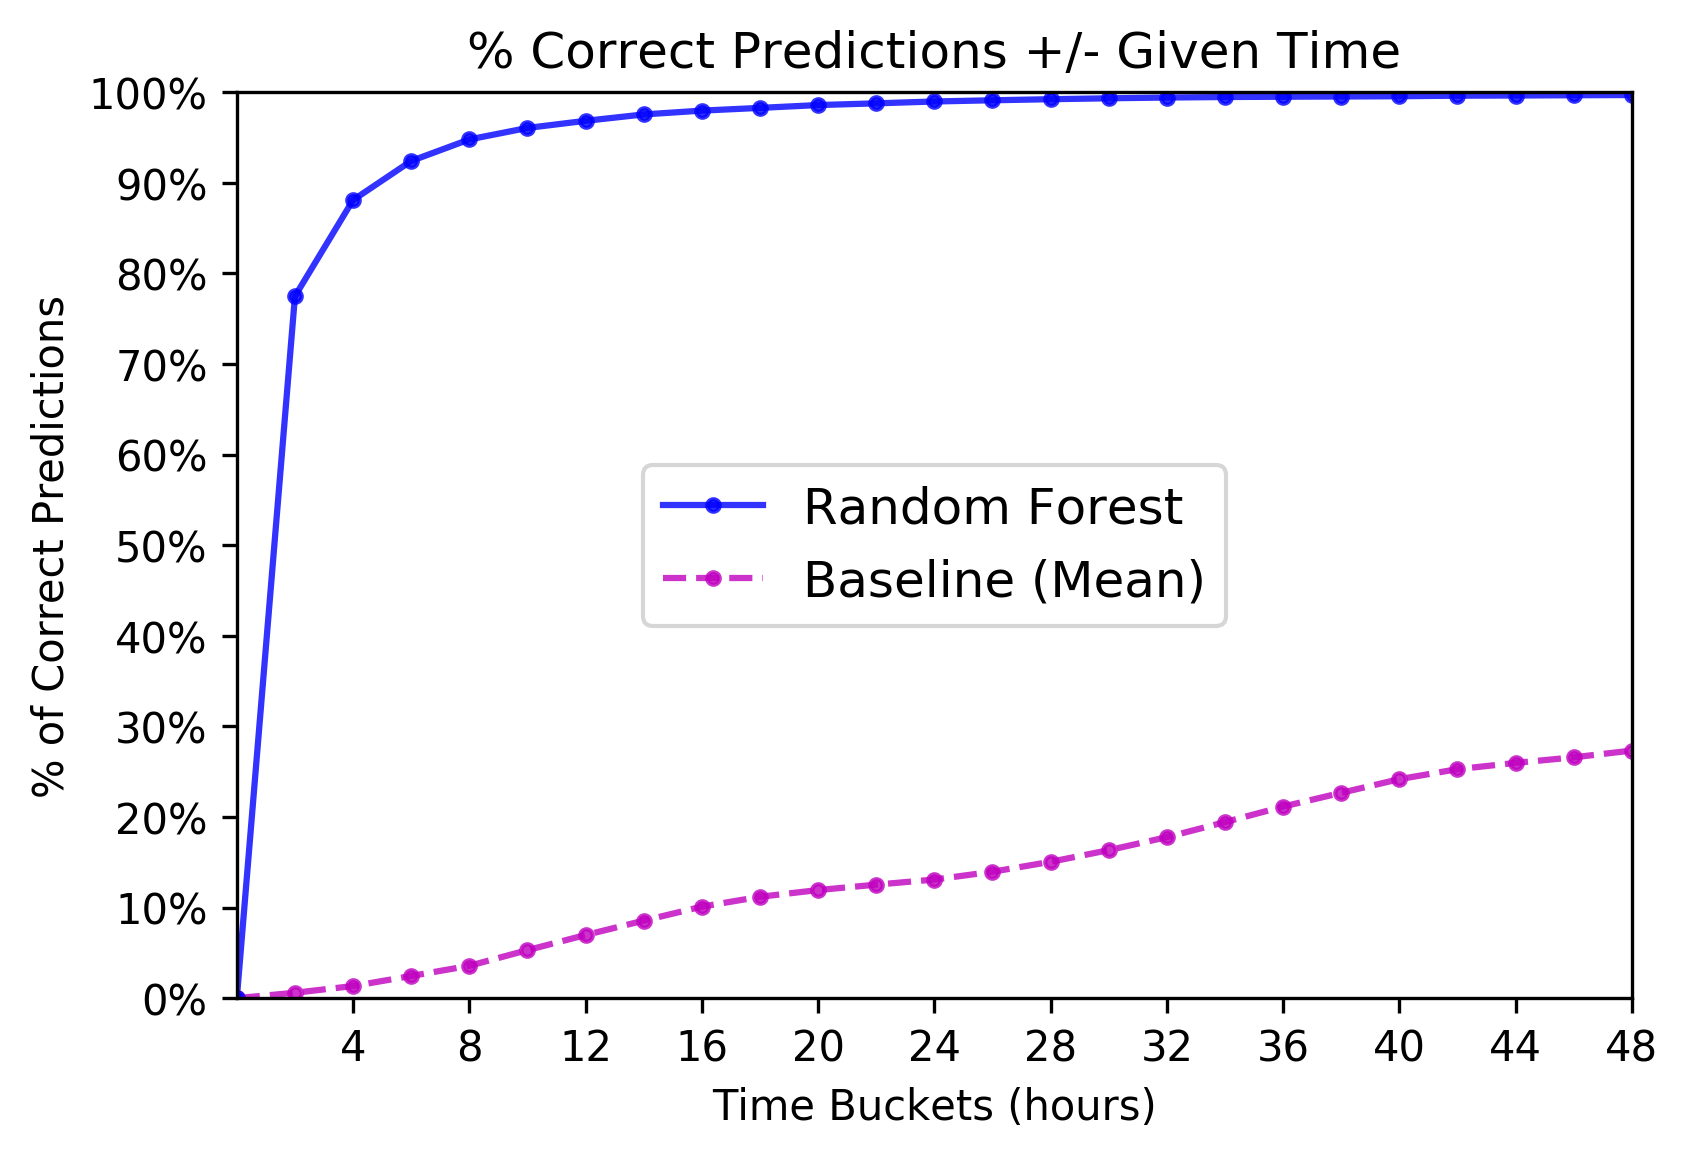

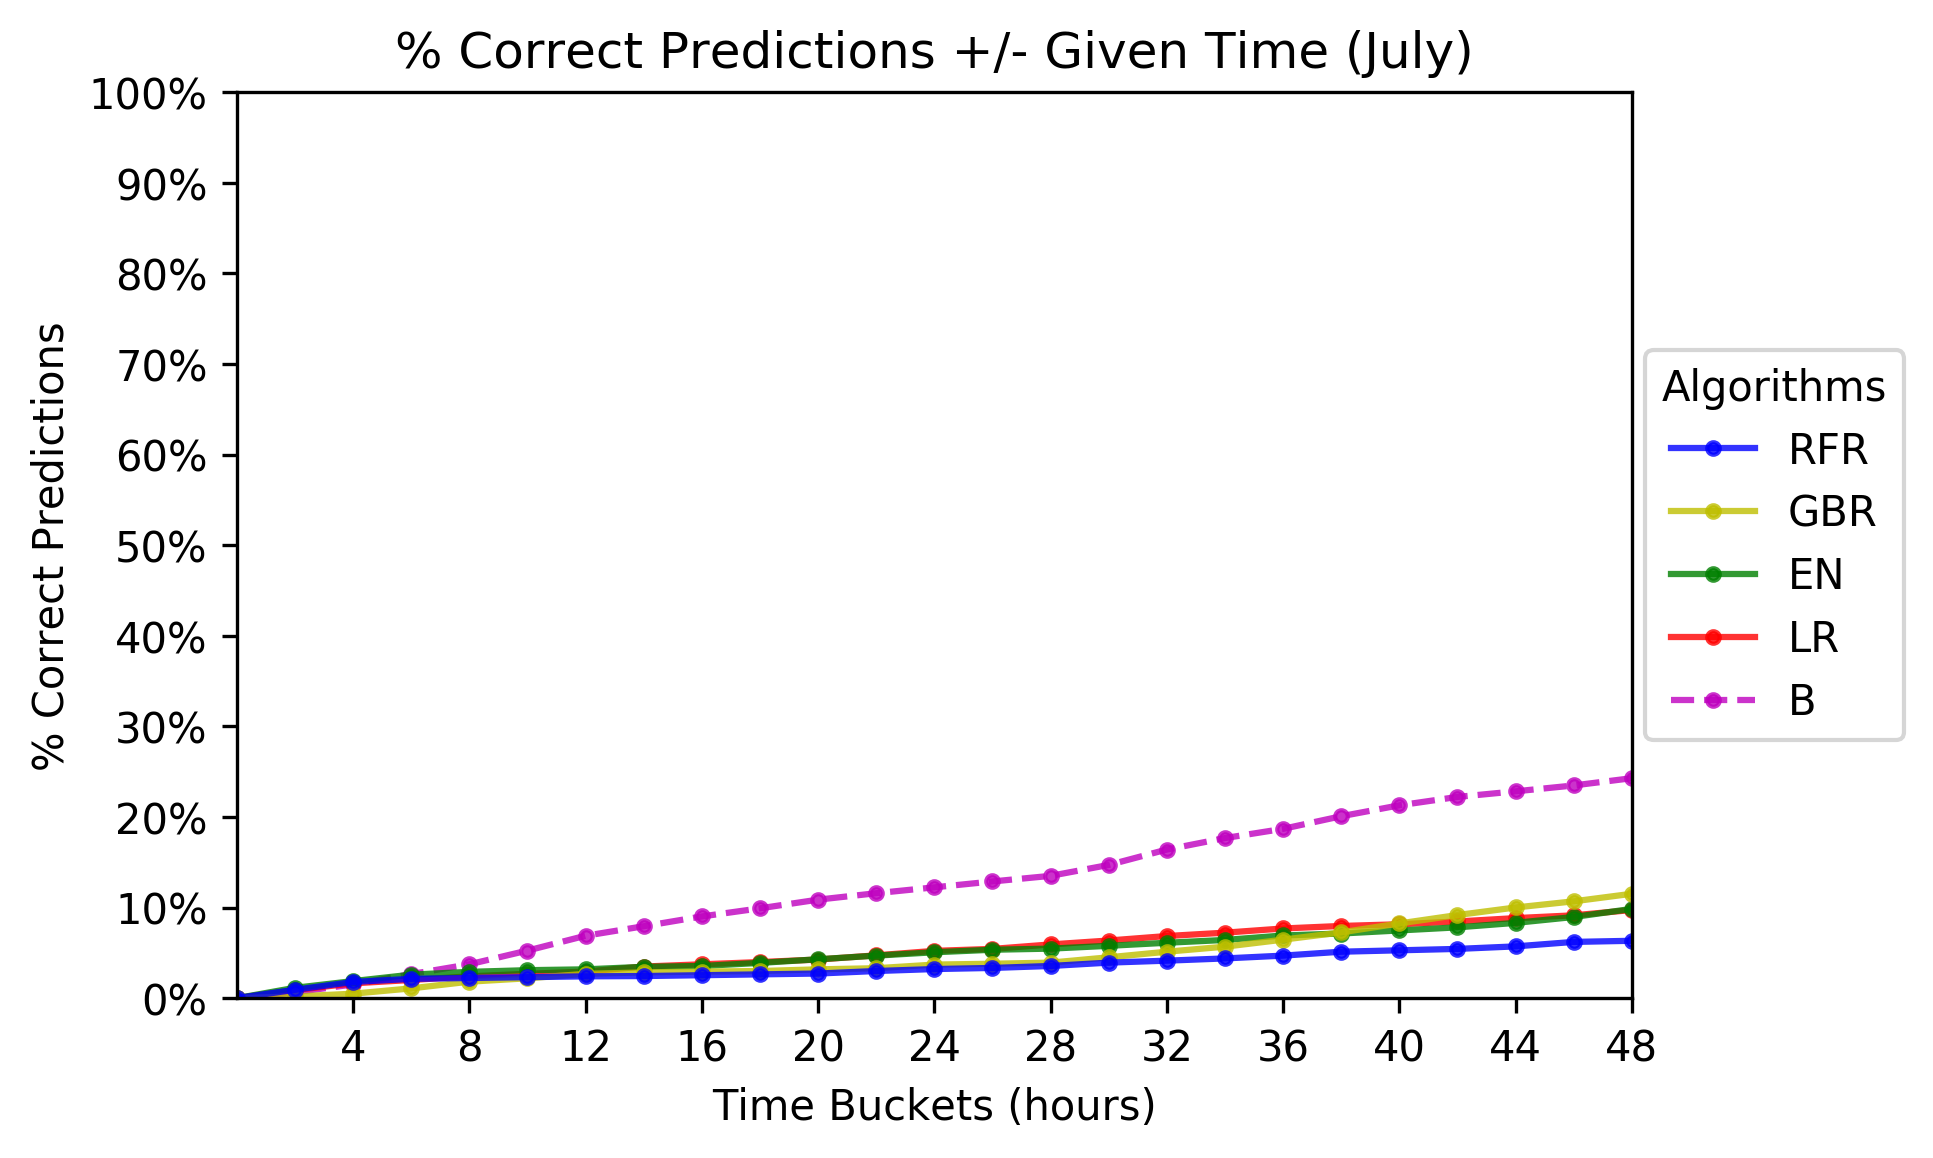

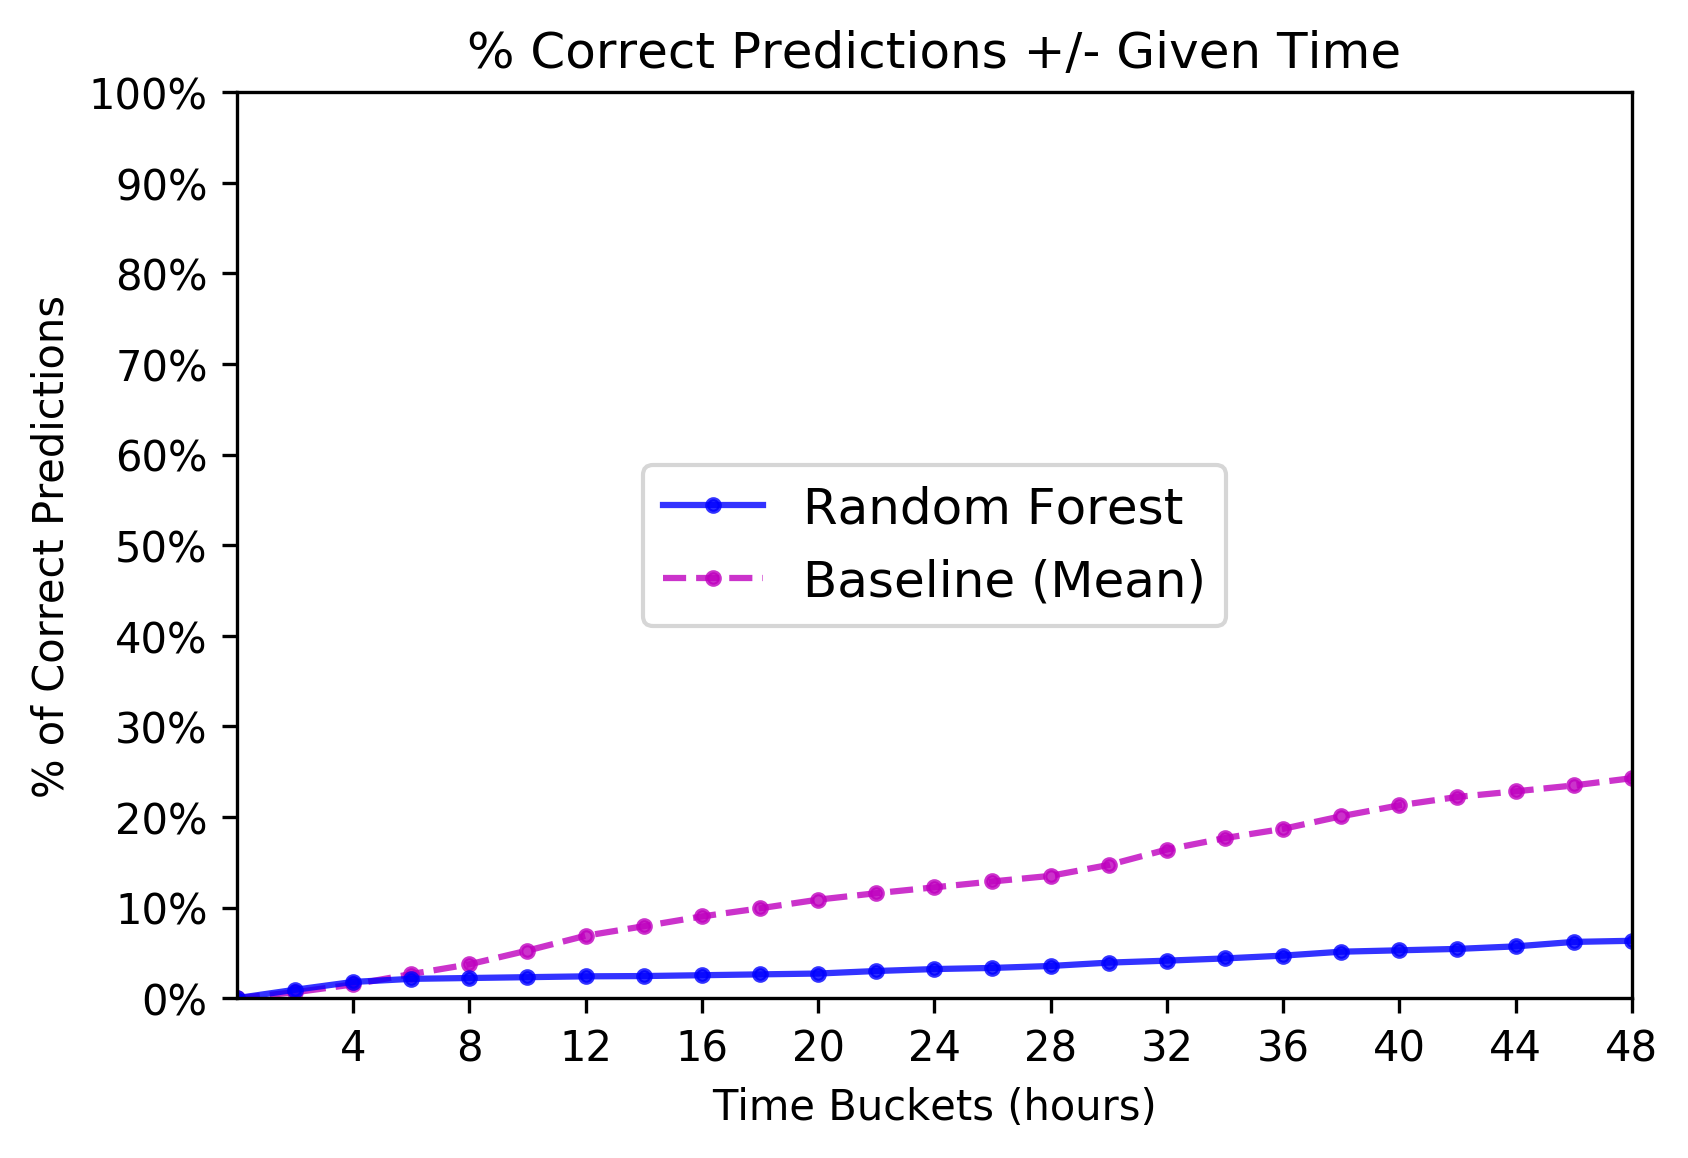

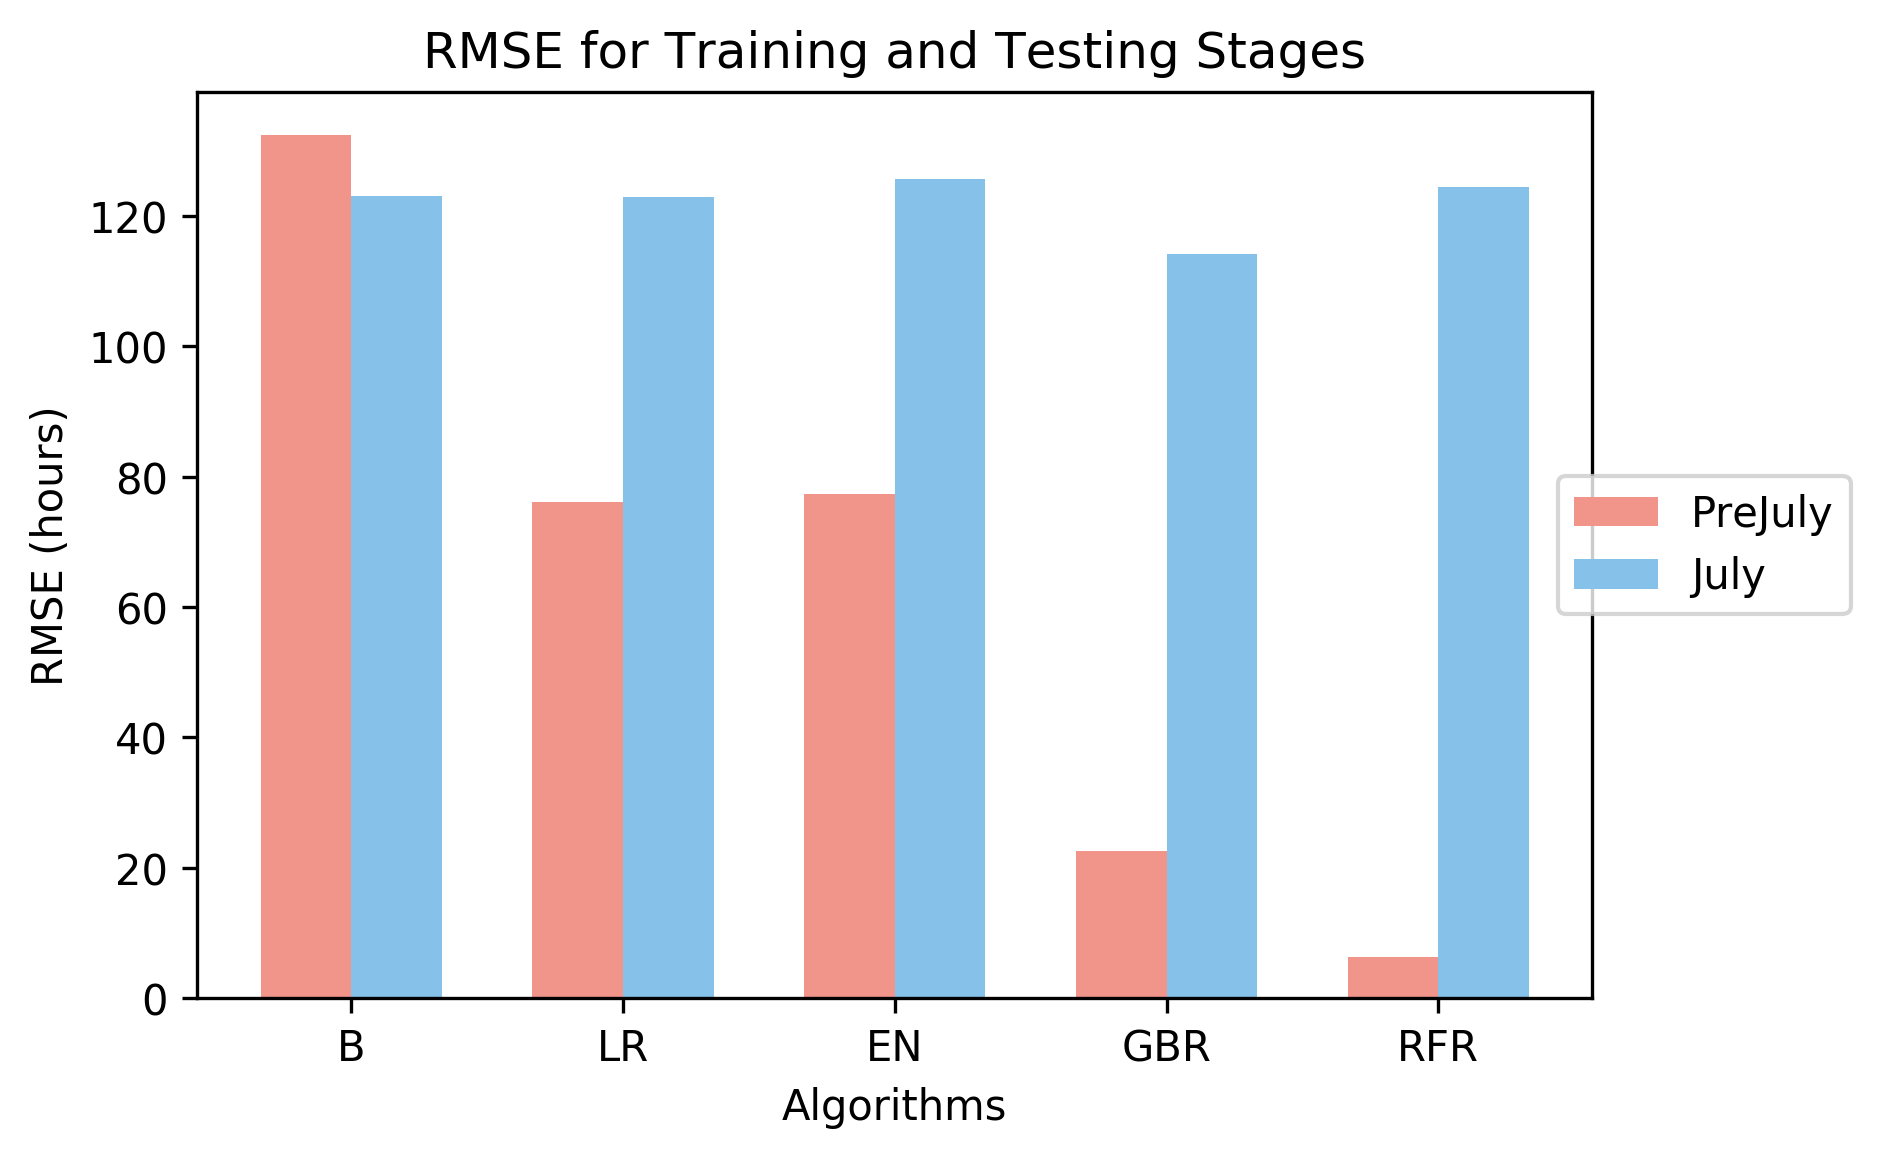

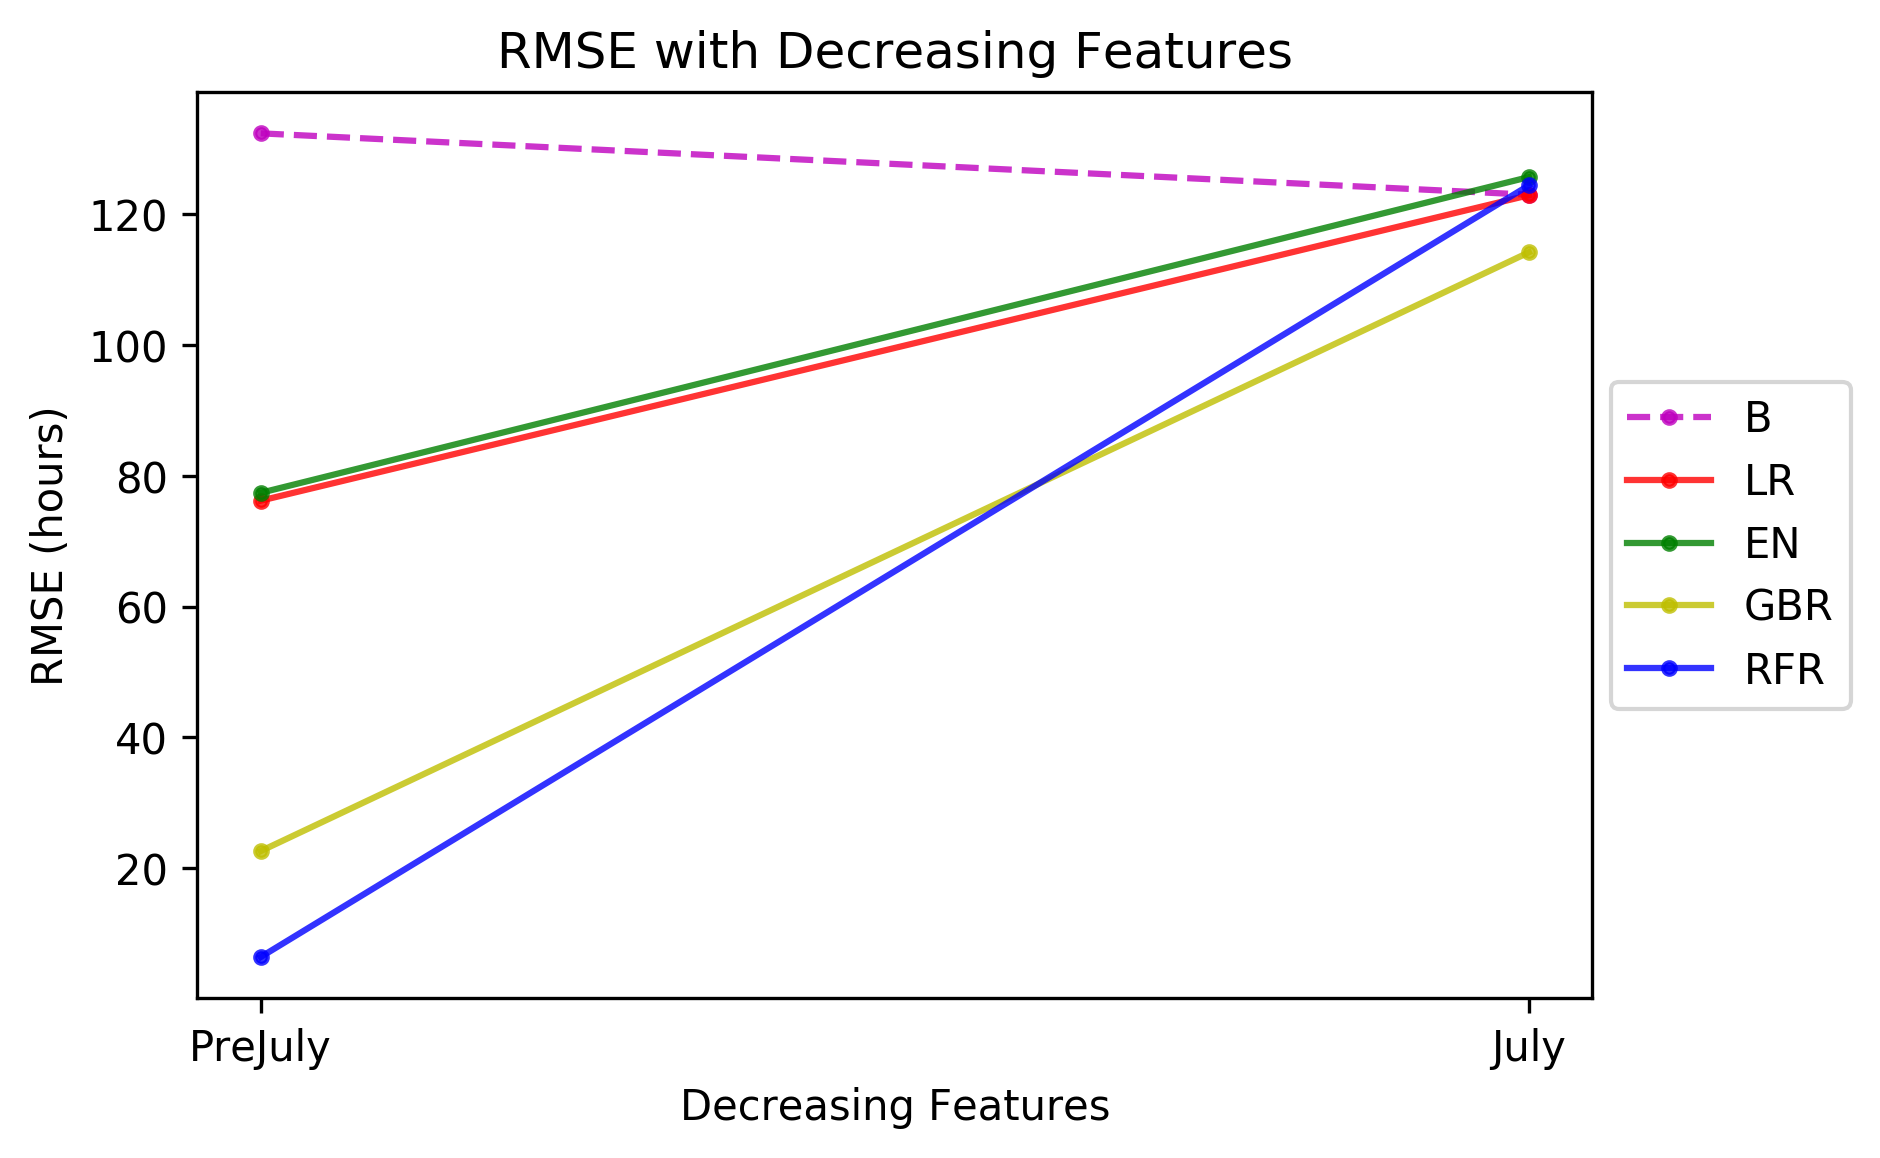

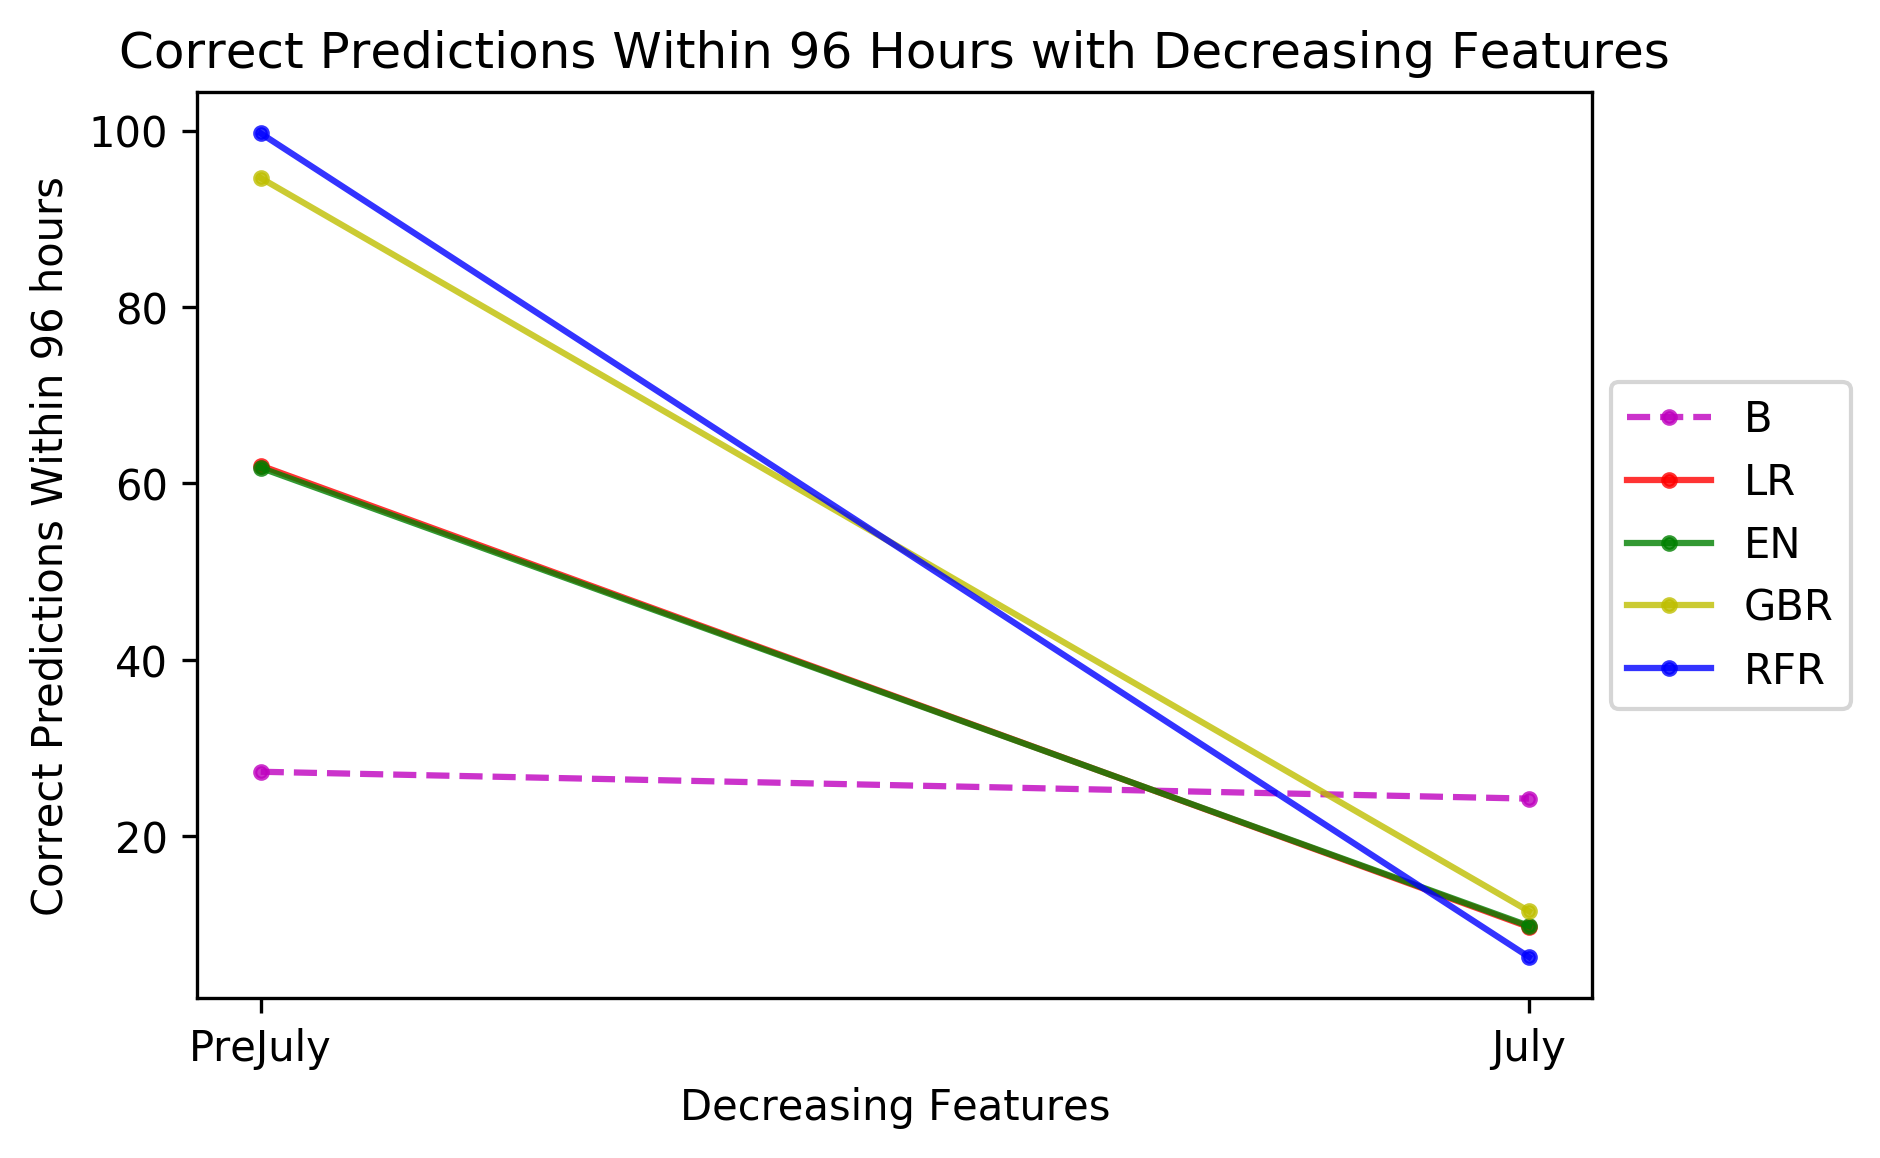

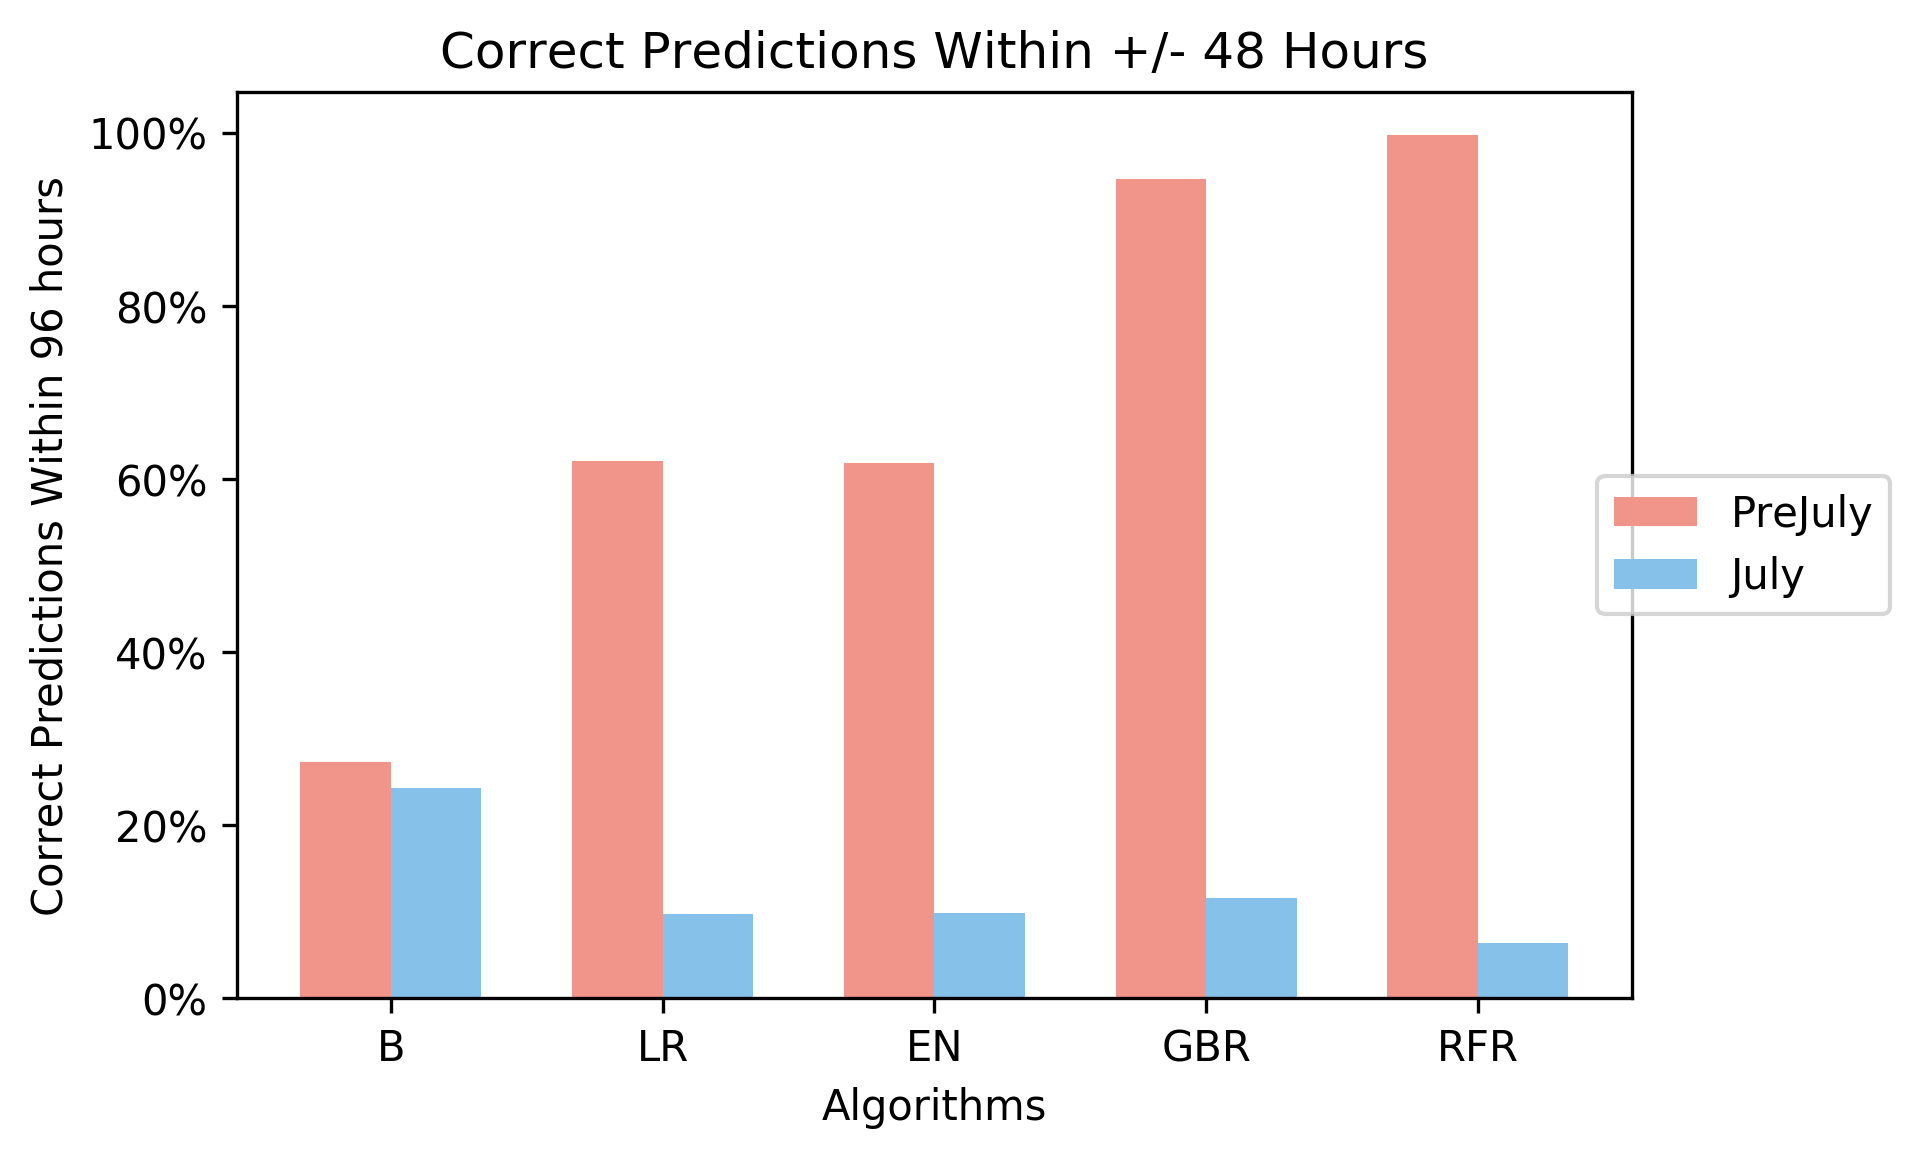

In [60]:
# print("\n..plotting pct correct..\n")
for pct_close, title in zip(df_pct_closes, input_file_names):
    multi_plot.multi_plot_pct_correct(pct_close, newpath, d, title)

# print("\n..plotting RMSE bar..\n")
if "July" in input_file_names or "June" in input_file_names:
    actual_title = "RMSE for Training and Testing Stages"
else:
    actual_title = "RMSE for each Algorithm"
multi_plot.multi_plot_RMSEs_bar(dfs_RMSEs, newpath, d, input_file_names, actual_title)

# print("\n..plotting RMSE line..\n")
dfs_RMSEs_T = np.transpose(dfs_RMSEs)
multi_plot.multi_plot_RMSEs_line(dfs_RMSEs_T, newpath, d, input_file_names)

# print("\n..plotting pct correct within 96 hours..\n")
dfs_pct_close96_T = np.transpose(dfs_pct_close96)
multi_plot.multi_plot_within96(dfs_pct_close96_T, newpath, d, input_file_names)

actual_title = "Correct Predictions Within +/- 48 Hours"
multi_plot.multi_plot_within96_bar(dfs_pct_close96, newpath, d, input_file_names, actual_title=actual_title)